In [8]:
import os
from pathlib import Path
import logging
from datetime import datetime

import pandas as pd
from matplotlib import pyplot as plt

# Set up logging and CSV export directories
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
log_dir = Path("figures/analysis/logs")
csv_dir = Path("figures/analysis/csv_exports")
log_dir.mkdir(parents=True, exist_ok=True)
csv_dir.mkdir(parents=True, exist_ok=True)

log_file = log_dir / f"analysis_results_{timestamp}.log"

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler(log_file),
        logging.StreamHandler()  # Also log to console
    ]
)

logger = logging.getLogger(__name__)
logger.info(f"Starting performance analysis - Log file: {log_file}")
logger.info(f"CSV exports will be saved to: {csv_dir}")

# Get list of all CSV files in the directory
list_of_commits = list(Path("../../logs/performance/analysis").glob("*/"))
list_of_commits.sort(key=os.path.getmtime, reverse=True)
list_of_commits = list_of_commits[:1]
# Initialize an empty DataFrame to store combined results
df_latest = pd.DataFrame()

list_of_files = list(Path(list_of_commits[0] / "all").glob("*.csv"))
logger.info(f"Processing {len(list_of_files)} CSV files from {list_of_commits[0]}")

# For each file in this commit
for file_path in list_of_files:
    # Read the CSV file
    temp_df = pd.read_csv(file_path)

    # Append to the main DataFrame
    df_latest = pd.concat([df_latest, temp_df], ignore_index=True)

# Adjust num_workers: subtract 1 if not 0
df_latest["fainder_max_workers"] = df_latest["fainder_max_workers"].apply(
    lambda x: x - 1 if x != 0 else x
)

# format: "timestamp", "category", "test_name", "query", "scenario",
#          "execution_time", "results_consistent", "fainder_mode",
#          "num_results", "ids", "num_terms", "id_str", "write_groups_used",
#          "write_groups_actually_used", "fainder_parallel", "fainder_max_workers",
#          "fainder_contiguous_chunks", "optimizer_cost_sorting",
#          "optimizer_keyword_merging", "optimizer_split_up_junctions"
print(df_latest)

# First check the unique category values to see what we're working with
print("Unique categories:", df_latest["category"].unique())
logger.info(f"Loaded {len(df_latest)} total records")
logger.info(f"Unique categories: {list(df_latest['category'].unique())}")
logger.info(f"Unique fainder modes: {list(df_latest['fainder_mode'].unique())}")
logger.info(f"Unique scenarios: {list(df_latest['scenario'].unique())}")
logger.info(f"Worker counts: {sorted(df_latest['fainder_max_workers'].unique())}")

# Strip whitespace and normalize the category column
df_latest["category"] = df_latest["category"].str.strip()

# Save processed data to CSV
processed_data_file = csv_dir / f"processed_data_{timestamp}.csv"
df_latest.to_csv(processed_data_file, index=False)
logger.info(f"Saved processed data to: {processed_data_file}")

os.makedirs("figures/analysis", exist_ok=True)

2025-07-03 13:39:28,826 - INFO - Starting performance analysis - Log file: figures/analysis/logs/analysis_results_20250703_133928.log
2025-07-03 13:39:28,829 - INFO - CSV exports will be saved to: figures/analysis/csv_exports
2025-07-03 13:39:28,834 - INFO - Processing 4 CSV files from ../../logs/performance/analysis/change-excecution-oreder-analysis_25dc1513c952f454e895bc2abae886f25c97e45c
2025-07-03 13:39:28,829 - INFO - CSV exports will be saved to: figures/analysis/csv_exports
2025-07-03 13:39:28,834 - INFO - Processing 4 CSV files from ../../logs/performance/analysis/change-excecution-oreder-analysis_25dc1513c952f454e895bc2abae886f25c97e45c
2025-07-03 13:39:29,155 - INFO - Loaded 42832 total records
2025-07-03 13:39:29,159 - INFO - Unique categories: ['base_keyword_queries', 'base_keyword_queries_with_multiple_elements', 'base_column_name_queries', 'base_percentile_queries', 'Percentile_Combinations', 'Multiple_Percentile_Combinations', 'Expected_Form', 'Expected_Form_Extended', '

                 timestamp              category  \
0      2025-07-02 22:36:55  base_keyword_queries   
1      2025-07-02 22:36:55  base_keyword_queries   
2      2025-07-02 22:36:55  base_keyword_queries   
3      2025-07-02 22:36:55  base_keyword_queries   
4      2025-07-02 22:36:56  base_keyword_queries   
...                    ...                   ...   
42827  2025-07-03 12:44:57      NOT_Combinations   
42828  2025-07-03 12:45:14      NOT_Combinations   
42829  2025-07-03 12:45:14      NOT_Combinations   
42830  2025-07-03 12:45:14      NOT_Combinations   
42831  2025-07-03 12:45:14      NOT_Combinations   

                              test_name  \
0                      simple_keyword_1   
1                      simple_keyword_1   
2                      simple_keyword_1   
3                      simple_keyword_1   
4                      simple_keyword_1   
...                                 ...   
42827  mixed_combination_AND_10_0-1-2-3   
42828  mixed_combination_AND_10

2025-07-03 13:39:29,533 - INFO - Saved processed data to: figures/analysis/csv_exports/processed_data_20250703_133928.csv


In [9]:
# Filter the DataFrame by category with stripped values
base_keyword_queries = df_latest[
    df_latest["category"] == "base_keyword_queries"
].reset_index(drop=True)
base_keyword_queries_with_multiple_elements = df_latest[
    df_latest["category"] == "base_keyword_queries_with_multiple_elements"
].reset_index(drop=True)
base_percentile_queries = df_latest[
    df_latest["category"] == "base_percentile_queries"
].reset_index(drop=True)
base_column_name_queries = df_latest[
    df_latest["category"] == "base_column_name_queries"
].reset_index(drop=True)
percentile_combinations = df_latest[
    df_latest["category"] == "percentile_combinations"
].reset_index(drop=True)
mixed_combinations_with_fixed_structure = df_latest[
    df_latest["category"] == "mixed_combinations_with_fixed_structure"
].reset_index(drop=True)
mixed_combinations_with_fixed_structure_extented = df_latest[
    df_latest["category"] == "mixed_combinations_with_fixed_structure_extented"
].reset_index(drop=True)
early_exit = df_latest[df_latest["category"] == "early_exit"].reset_index(drop=True)
# Filter for multiple percentile combinations
multiple_percentile_combinations = df_latest[
    df_latest["category"] == "multiple_percentile_combinations"
].reset_index(drop=True)
multiple_percentile_combinations_with_kw = df_latest[
    df_latest["category"] == "multiple_percentile_combinations_with_kw"
].reset_index(drop=True)
expected_form_not_queries = df_latest[
    df_latest["category"] == "expected_form_not_queries"
].reset_index(drop=True)
double_expected_form_queries = df_latest[
    df_latest["category"] == "double_expected_form_queries"
].reset_index(drop=True)
middle_exit = df_latest[df_latest["category"] == "middle_exit"].reset_index(drop=True)

# Print to verify the filtering worked
print("\nCounts after fixing whitespace:")
print("Base keyword queries:", len(base_keyword_queries))
print(
    "Base keyword queries with multiple elements:",
    len(base_keyword_queries_with_multiple_elements),
)
print("Base percentile queries:", len(base_percentile_queries))
print("Percentile combinations:", len(percentile_combinations))
print(
    "Mixed combinations with fixed structure:",
    len(mixed_combinations_with_fixed_structure),
)
print(
    "Mixed combinations with fixed structure extended:",
    len(mixed_combinations_with_fixed_structure_extented),
)
print("Early exit:", len(early_exit))
print("Multiple percentile combinations:", len(multiple_percentile_combinations))
print(
    "Multiple percentile combinations with keyword:",
    len(multiple_percentile_combinations_with_kw),
)
print("Expected form not queries:", len(expected_form_not_queries))
print("Double expected form queries:", len(double_expected_form_queries))
print("Middle exit:", len(middle_exit))

# Log and save category counts to CSV
logger.info("=== Category Filtering Results ===")
category_counts = {
    "base_keyword_queries": len(base_keyword_queries),
    "base_keyword_queries_with_multiple_elements": len(base_keyword_queries_with_multiple_elements),
    "base_percentile_queries": len(base_percentile_queries),
    "base_column_name_queries": len(base_column_name_queries),
    "percentile_combinations": len(percentile_combinations),
    "mixed_combinations_with_fixed_structure": len(mixed_combinations_with_fixed_structure),
    "mixed_combinations_with_fixed_structure_extented": len(mixed_combinations_with_fixed_structure_extented),
    "early_exit": len(early_exit),
    "multiple_percentile_combinations": len(multiple_percentile_combinations),
    "multiple_percentile_combinations_with_kw": len(multiple_percentile_combinations_with_kw),
    "expected_form_not_queries": len(expected_form_not_queries),
    "double_expected_form_queries": len(double_expected_form_queries),
    "middle_exit": len(middle_exit)
}

for category, count in category_counts.items():
    logger.info(f"{category}: {count} records")

# Save category counts to CSV
category_counts_df = pd.DataFrame(list(category_counts.items()), columns=['category', 'count'])
category_counts_file = csv_dir / f"category_counts_{timestamp}.csv"
category_counts_df.to_csv(category_counts_file, index=False)
logger.info(f"Saved category counts to: {category_counts_file}")

# Save individual category datasets to CSV
category_datasets = {
    "base_keyword_queries": base_keyword_queries,
    "base_keyword_queries_with_multiple_elements": base_keyword_queries_with_multiple_elements,
    "base_percentile_queries": base_percentile_queries,
    "base_column_name_queries": base_column_name_queries,
    "percentile_combinations": percentile_combinations,
    "mixed_combinations_with_fixed_structure": mixed_combinations_with_fixed_structure,
    "mixed_combinations_with_fixed_structure_extented": mixed_combinations_with_fixed_structure_extented,
    "early_exit": early_exit,
    "multiple_percentile_combinations": multiple_percentile_combinations,
    "multiple_percentile_combinations_with_kw": multiple_percentile_combinations_with_kw,
    "expected_form_not_queries": expected_form_not_queries,
    "double_expected_form_queries": double_expected_form_queries,
    "middle_exit": middle_exit
}

for cat_name, cat_data in category_datasets.items():
    if not cat_data.empty:
        cat_file = csv_dir / f"{cat_name}_{timestamp}.csv"
        cat_data.to_csv(cat_file, index=False)
        logger.info(f"Saved {cat_name} data to: {cat_file}")

# Prepare data for plotting
# Get unique scenarios and colors for plotting
scenarios = base_keyword_queries["scenario"].unique()
colors = ["r", "g", "b", "y", "c", "m", "k"]
logger.info(f"Found {len(scenarios)} unique scenarios: {list(scenarios)}")

2025-07-03 13:39:29,579 - INFO - === Category Filtering Results ===
2025-07-03 13:39:29,580 - INFO - base_keyword_queries: 1280 records
2025-07-03 13:39:29,581 - INFO - base_keyword_queries_with_multiple_elements: 488 records
2025-07-03 13:39:29,581 - INFO - base_percentile_queries: 2160 records
2025-07-03 13:39:29,582 - INFO - base_column_name_queries: 2160 records
2025-07-03 13:39:29,582 - INFO - percentile_combinations: 0 records
2025-07-03 13:39:29,582 - INFO - mixed_combinations_with_fixed_structure: 0 records
2025-07-03 13:39:29,583 - INFO - mixed_combinations_with_fixed_structure_extented: 0 records
2025-07-03 13:39:29,583 - INFO - early_exit: 0 records
2025-07-03 13:39:29,583 - INFO - multiple_percentile_combinations: 0 records
2025-07-03 13:39:29,583 - INFO - multiple_percentile_combinations_with_kw: 0 records
2025-07-03 13:39:29,583 - INFO - expected_form_not_queries: 0 records
2025-07-03 13:39:29,584 - INFO - double_expected_form_queries: 0 records
2025-07-03 13:39:29,584 - 


Counts after fixing whitespace:
Base keyword queries: 1280
Base keyword queries with multiple elements: 488
Base percentile queries: 2160
Percentile combinations: 0
Mixed combinations with fixed structure: 0
Mixed combinations with fixed structure extended: 0
Early exit: 0
Multiple percentile combinations: 0
Multiple percentile combinations with keyword: 0
Expected form not queries: 0
Double expected form queries: 0
Middle exit: 0


2025-07-03 13:39:29,626 - INFO - === Base Predicates Analysis ===
2025-07-03 13:39:29,635 - INFO - Base Keyword Queries - Mean: 0.2156s, Median: 0.1725s, Min: 0.0076s, Max: 0.5547s
2025-07-03 13:39:29,638 - INFO - Base Column Name Queries - Mean: 0.0837s, Median: 0.0811s, Min: 0.0156s, Max: 0.1472s
2025-07-03 13:39:29,635 - INFO - Base Keyword Queries - Mean: 0.2156s, Median: 0.1725s, Min: 0.0076s, Max: 0.5547s
2025-07-03 13:39:29,638 - INFO - Base Column Name Queries - Mean: 0.0837s, Median: 0.0811s, Min: 0.0156s, Max: 0.1472s
2025-07-03 13:39:29,641 - INFO - Base Percentile Queries (full_precision) - Mean: 0.0516s, Median: 0.0494s, Min: 0.0121s, Max: 0.1282s
2025-07-03 13:39:29,645 - INFO - Percentile Queries (exact, 28 workers) - Mean: 1.7565s, Median: 1.7177s, Min: 0.6279s, Max: 3.7501s
2025-07-03 13:39:29,648 - INFO - Percentile Queries (exact, 0 workers) - Mean: 17.3852s, Median: 15.0004s, Min: 5.3446s, Max: 46.7114s
2025-07-03 13:39:29,650 - INFO - Percentile Queries (exact, 6 w

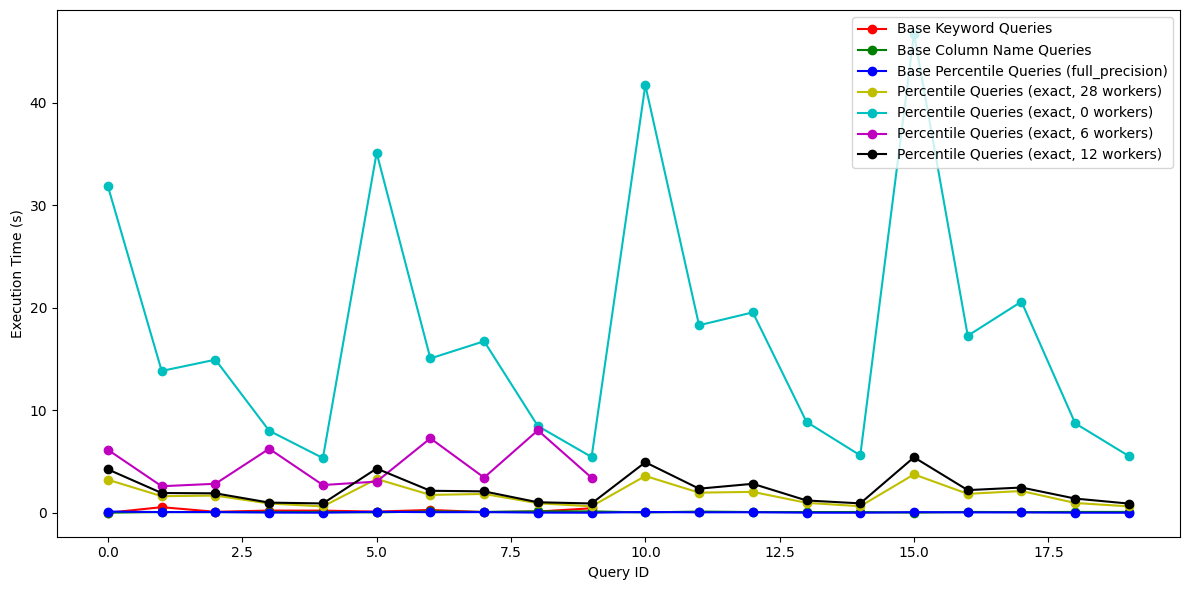

In [10]:
# a plot with three lines (one base_keyword_queries and two percentile queries (different fainder modes) per num_workers) x-axis is queryid

logger.info("=== Base Predicates Analysis ===")

plt.figure(figsize=(12, 6))
#plt.title("Base Keyword Queries vs Percentile Queries")
plt.xlabel("Query ID")
plt.ylabel("Execution Time (s)")
fainder_modes = base_keyword_queries["fainder_mode"].unique()

# Prepare list to collect summary statistics for CSV export
base_predicates_stats = []

# Plot base keyword queries
base_keyword_queries_grouped = (
    base_keyword_queries.groupby("query")["execution_time"].mean().reset_index()
)
plt.plot(
    base_keyword_queries_grouped.index,
    base_keyword_queries_grouped["execution_time"],
    label="Base Keyword Queries",
    color=colors[0],
    marker="o",
)

# Log and collect base keyword queries stats
base_kw_stats = base_keyword_queries_grouped["execution_time"].describe()
logger.info(f"Base Keyword Queries - Mean: {base_kw_stats['mean']:.4f}s, "
           f"Median: {base_kw_stats['50%']:.4f}s, "
           f"Min: {base_kw_stats['min']:.4f}s, "
           f"Max: {base_kw_stats['max']:.4f}s")

base_predicates_stats.append({
    'query_type': 'Base Keyword Queries',
    'fainder_mode': 'N/A',
    'workers': 'N/A',
    'mean': base_kw_stats['mean'],
    'median': base_kw_stats['50%'],
    'min': base_kw_stats['min'],
    'max': base_kw_stats['max'],
    'std': base_kw_stats['std'],
    'count': base_kw_stats['count']
})

# Plot column name queries
base_column_name_queries_grouped = (
    base_column_name_queries.groupby("query")["execution_time"].mean().reset_index()
)
plt.plot(
    base_column_name_queries_grouped.index,
    base_column_name_queries_grouped["execution_time"],
    label="Base Column Name Queries",
    color=colors[1],
    marker="o",
)

# Log and collect column name queries stats
if not base_column_name_queries_grouped.empty:
    col_name_stats = base_column_name_queries_grouped["execution_time"].describe()
    logger.info(f"Base Column Name Queries - Mean: {col_name_stats['mean']:.4f}s, "
               f"Median: {col_name_stats['50%']:.4f}s, "
               f"Min: {col_name_stats['min']:.4f}s, "
               f"Max: {col_name_stats['max']:.4f}s")
    
    base_predicates_stats.append({
        'query_type': 'Base Column Name Queries',
        'fainder_mode': 'N/A',
        'workers': 'N/A',
        'mean': col_name_stats['mean'],
        'median': col_name_stats['50%'],
        'min': col_name_stats['min'],
        'max': col_name_stats['max'],
        'std': col_name_stats['std'],
        'count': col_name_stats['count']
    })

i = 2
# Plot base percentile queries not exact mode
fainder_modes_without_exact = [mode for mode in fainder_modes if mode != "exact"]

for fainder_mode in fainder_modes_without_exact:
    mode_queries = base_percentile_queries[
        base_percentile_queries["fainder_mode"] == fainder_mode
    ].reset_index(drop=True)
    mode_queries_grouped = mode_queries.groupby("query")["execution_time"].mean().reset_index()
    plt.plot(
        mode_queries_grouped.index,
        mode_queries_grouped["execution_time"],
        label=f"Base Percentile Queries ({fainder_mode})",
        color=colors[i % len(colors)],
        marker="o",
    )
    
    # Log and collect percentile queries stats for this mode
    if not mode_queries_grouped.empty:
        mode_stats = mode_queries_grouped["execution_time"].describe()
        logger.info(f"Base Percentile Queries ({fainder_mode}) - Mean: {mode_stats['mean']:.4f}s, "
                   f"Median: {mode_stats['50%']:.4f}s, "
                   f"Min: {mode_stats['min']:.4f}s, "
                   f"Max: {mode_stats['max']:.4f}s")
        
        base_predicates_stats.append({
            'query_type': 'Base Percentile Queries',
            'fainder_mode': fainder_mode,
            'workers': 'N/A',
            'mean': mode_stats['mean'],
            'median': mode_stats['50%'],
            'min': mode_stats['min'],
            'max': mode_stats['max'],
            'std': mode_stats['std'],
            'count': mode_stats['count']
        })
    i += 1

# Plot base percentile queries [exact]
num_workers = base_percentile_queries["fainder_max_workers"].unique()

fainder_mode_exact = "exact"
for num_worker in num_workers:
    percentile_queries = base_percentile_queries[
        base_percentile_queries["fainder_max_workers"] == num_worker
    ].reset_index(drop=True)
    mode_queries = percentile_queries[
        percentile_queries["fainder_mode"] == fainder_mode_exact
    ].reset_index(drop=True)
    mode_queries_grouped = mode_queries.groupby("query")["execution_time"].mean().reset_index()
    # Adjust worker display: show actual worker count
    display_workers = num_worker + 1 if num_worker != 0 else 0
    plt.plot(
        mode_queries_grouped.index,
        mode_queries_grouped["execution_time"],
        label=f"Percentile Queries ({fainder_mode_exact}, {display_workers} workers)",
        color=colors[i % len(colors)],
        marker="o",
    )
    
    # Log and collect exact mode stats for this worker count
    if not mode_queries_grouped.empty:
        worker_stats = mode_queries_grouped["execution_time"].describe()
        logger.info(f"Percentile Queries (exact, {display_workers} workers) - Mean: {worker_stats['mean']:.4f}s, "
                   f"Median: {worker_stats['50%']:.4f}s, "
                   f"Min: {worker_stats['min']:.4f}s, "
                   f"Max: {worker_stats['max']:.4f}s")
        
        base_predicates_stats.append({
            'query_type': 'Percentile Queries',
            'fainder_mode': fainder_mode_exact,
            'workers': display_workers,
            'mean': worker_stats['mean'],
            'median': worker_stats['50%'],
            'min': worker_stats['min'],
            'max': worker_stats['max'],
            'std': worker_stats['std'],
            'count': worker_stats['count']
        })
    i += 1

# Save base predicates statistics to CSV
base_predicates_stats_df = pd.DataFrame(base_predicates_stats)
base_predicates_stats_file = csv_dir / f"base_predicates_stats_{timestamp}.csv"
base_predicates_stats_df.to_csv(base_predicates_stats_file, index=False)
logger.info(f"Saved base predicates statistics to: {base_predicates_stats_file}")

plt.xticks()
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/analysis/base_predicates.png")
logger.info("Saved base predicates plot to figures/analysis/base_predicates.png")

2025-07-03 13:39:29,828 - INFO - === NOT Combinations Heatmap Analysis ===
2025-07-03 13:39:29,833 - INFO - Analyzing category: NOT_Combinations with 14400 records
2025-07-03 13:39:29,836 - INFO -   Fainder mode: full_precision with 7200 records
2025-07-03 13:39:29,837 - INFO -     single group: 4 IDs
2025-07-03 13:39:29,837 - INFO -     double group: 6 IDs
2025-07-03 13:39:29,837 - INFO -     triple group: 5 IDs
2025-07-03 13:39:29,838 - INFO -     all group: 15 IDs
2025-07-03 13:39:29,833 - INFO - Analyzing category: NOT_Combinations with 14400 records
2025-07-03 13:39:29,836 - INFO -   Fainder mode: full_precision with 7200 records
2025-07-03 13:39:29,837 - INFO -     single group: 4 IDs
2025-07-03 13:39:29,837 - INFO -     double group: 6 IDs
2025-07-03 13:39:29,837 - INFO -     triple group: 5 IDs
2025-07-03 13:39:29,838 - INFO -     all group: 15 IDs
2025-07-03 13:39:29,856 - INFO -     Saved heatmap data to: figures/analysis/csv_exports/heatmap_NOT_Combinations_full_precision_si

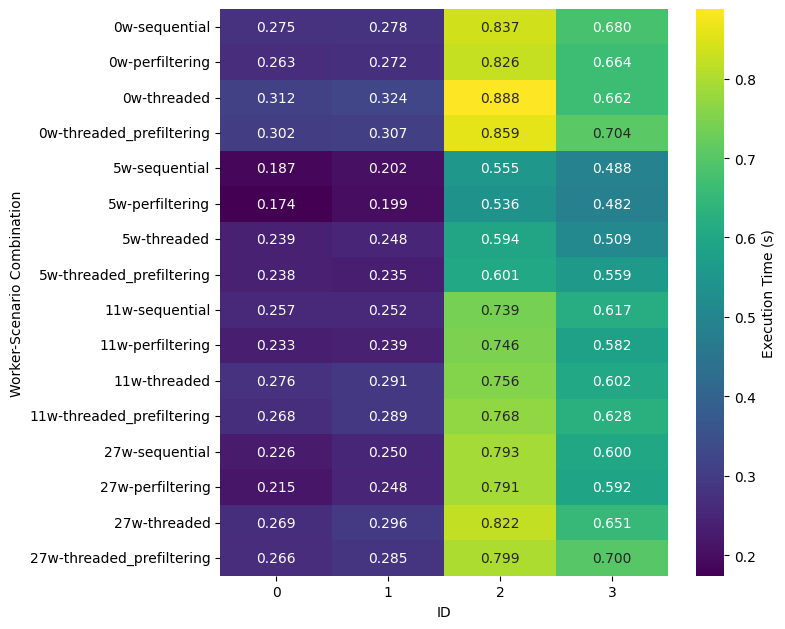

2025-07-03 13:39:30,290 - INFO -     Saved heatmap data to: figures/analysis/csv_exports/heatmap_NOT_Combinations_full_precision_double_20250703_133928.csv
2025-07-03 13:39:30,291 - INFO -     double heatmap stats - Mean: 0.6969s, Min: 0.2273s, Max: 1.3826s, Valid data points: 96
2025-07-03 13:39:30,291 - INFO -     double heatmap stats - Mean: 0.6969s, Min: 0.2273s, Max: 1.3826s, Valid data points: 96
2025-07-03 13:39:30,656 - INFO -     Saved heatmap: figures/analysis/NOT_Combinations_full_precision_double_heatmap.png
2025-07-03 13:39:30,656 - INFO -     Saved heatmap: figures/analysis/NOT_Combinations_full_precision_double_heatmap.png


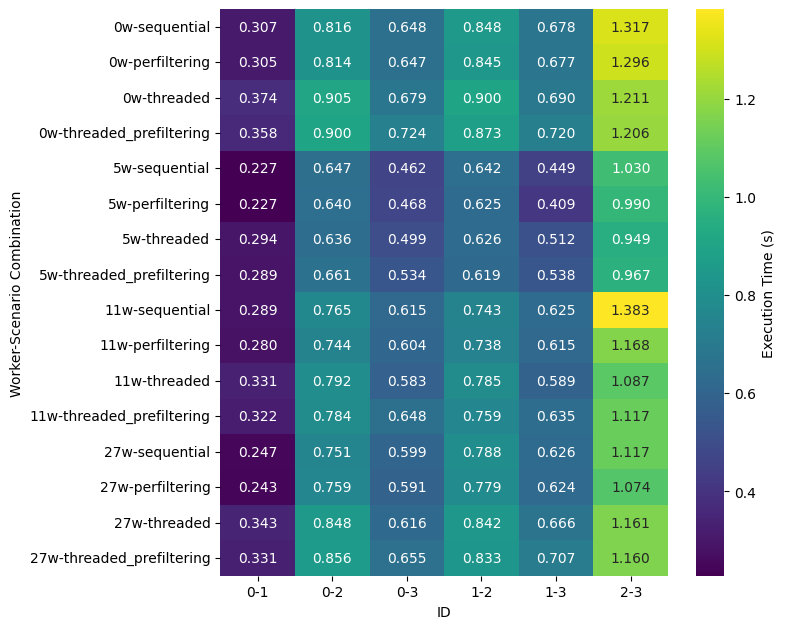

2025-07-03 13:39:30,773 - INFO -     Saved heatmap data to: figures/analysis/csv_exports/heatmap_NOT_Combinations_full_precision_triple_20250703_133928.csv
2025-07-03 13:39:30,773 - INFO -     triple heatmap stats - Mean: 0.9803s, Min: 0.5028s, Max: 1.3686s, Valid data points: 80
2025-07-03 13:39:30,773 - INFO -     triple heatmap stats - Mean: 0.9803s, Min: 0.5028s, Max: 1.3686s, Valid data points: 80
2025-07-03 13:39:31,114 - INFO -     Saved heatmap: figures/analysis/NOT_Combinations_full_precision_triple_heatmap.png
2025-07-03 13:39:31,114 - INFO -     Saved heatmap: figures/analysis/NOT_Combinations_full_precision_triple_heatmap.png


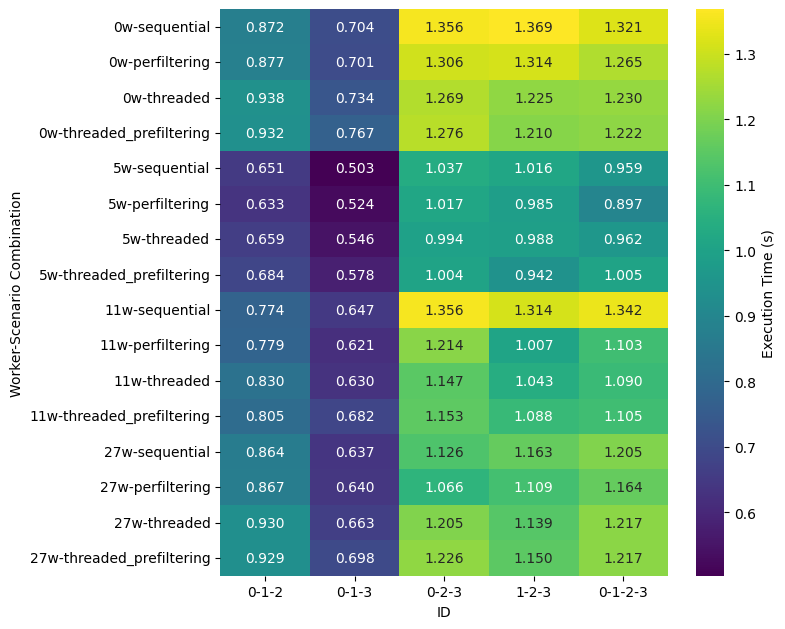

2025-07-03 13:39:31,220 - INFO -     Saved heatmap data to: figures/analysis/csv_exports/heatmap_NOT_Combinations_full_precision_all_20250703_133928.csv
2025-07-03 13:39:31,221 - INFO -     all heatmap stats - Mean: 0.7299s, Min: 0.1740s, Max: 1.3826s, Valid data points: 240
2025-07-03 13:39:31,221 - INFO -     all heatmap stats - Mean: 0.7299s, Min: 0.1740s, Max: 1.3826s, Valid data points: 240
2025-07-03 13:39:32,028 - INFO -     Saved heatmap: figures/analysis/NOT_Combinations_full_precision_all_heatmap.png
2025-07-03 13:39:32,028 - INFO -     Saved heatmap: figures/analysis/NOT_Combinations_full_precision_all_heatmap.png


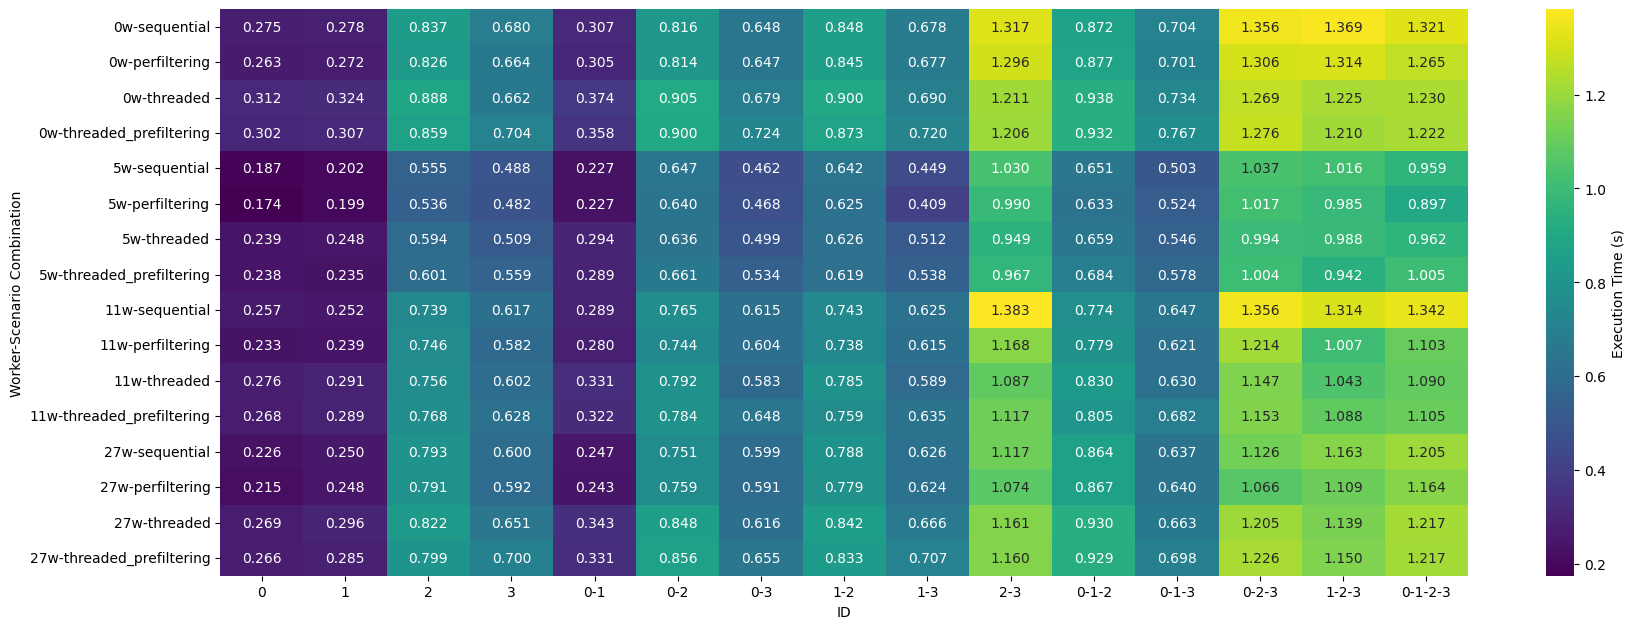

2025-07-03 13:39:32,207 - INFO -   Fainder mode: exact with 7200 records
2025-07-03 13:39:32,208 - INFO -     single group: 4 IDs
2025-07-03 13:39:32,208 - INFO -     double group: 6 IDs
2025-07-03 13:39:32,209 - INFO -     triple group: 5 IDs
2025-07-03 13:39:32,209 - INFO -     all group: 15 IDs
2025-07-03 13:39:32,208 - INFO -     single group: 4 IDs
2025-07-03 13:39:32,208 - INFO -     double group: 6 IDs
2025-07-03 13:39:32,209 - INFO -     triple group: 5 IDs
2025-07-03 13:39:32,209 - INFO -     all group: 15 IDs
2025-07-03 13:39:32,227 - INFO -     Saved heatmap data to: figures/analysis/csv_exports/heatmap_NOT_Combinations_exact_single_20250703_133928.csv
2025-07-03 13:39:32,227 - INFO -     Saved heatmap data to: figures/analysis/csv_exports/heatmap_NOT_Combinations_exact_single_20250703_133928.csv
2025-07-03 13:39:32,228 - INFO -     single heatmap stats - Mean: 5.2841s, Min: 0.3581s, Max: 27.2426s, Valid data points: 64
2025-07-03 13:39:32,228 - INFO -     single heatmap sta

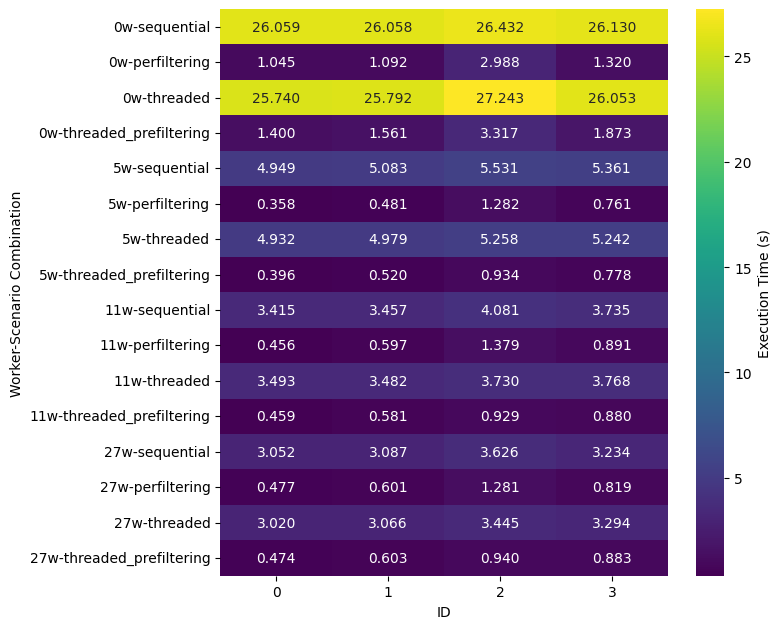

2025-07-03 13:39:32,663 - INFO -     Saved heatmap data to: figures/analysis/csv_exports/heatmap_NOT_Combinations_exact_double_20250703_133928.csv
2025-07-03 13:39:32,664 - INFO -     double heatmap stats - Mean: 6.2573s, Min: 0.4073s, Max: 27.5802s, Valid data points: 96
2025-07-03 13:39:32,664 - INFO -     double heatmap stats - Mean: 6.2573s, Min: 0.4073s, Max: 27.5802s, Valid data points: 96
2025-07-03 13:39:33,015 - INFO -     Saved heatmap: figures/analysis/NOT_Combinations_exact_double_heatmap.png
2025-07-03 13:39:33,015 - INFO -     Saved heatmap: figures/analysis/NOT_Combinations_exact_double_heatmap.png


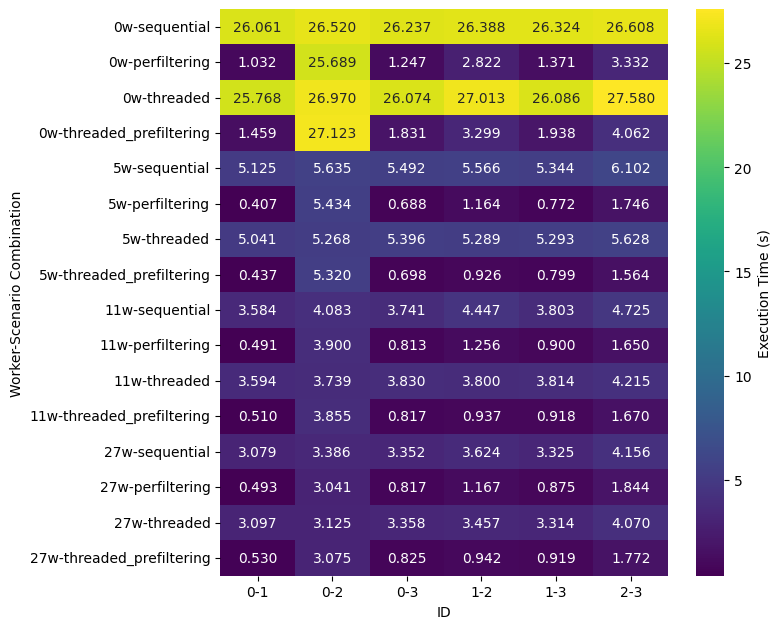

2025-07-03 13:39:33,132 - INFO -     Saved heatmap data to: figures/analysis/csv_exports/heatmap_NOT_Combinations_exact_triple_20250703_133928.csv
2025-07-03 13:39:33,133 - INFO -     triple heatmap stats - Mean: 8.3432s, Min: 0.7083s, Max: 27.8056s, Valid data points: 80
2025-07-03 13:39:33,133 - INFO -     triple heatmap stats - Mean: 8.3432s, Min: 0.7083s, Max: 27.8056s, Valid data points: 80
2025-07-03 13:39:33,480 - INFO -     Saved heatmap: figures/analysis/NOT_Combinations_exact_triple_heatmap.png
2025-07-03 13:39:33,480 - INFO -     Saved heatmap: figures/analysis/NOT_Combinations_exact_triple_heatmap.png


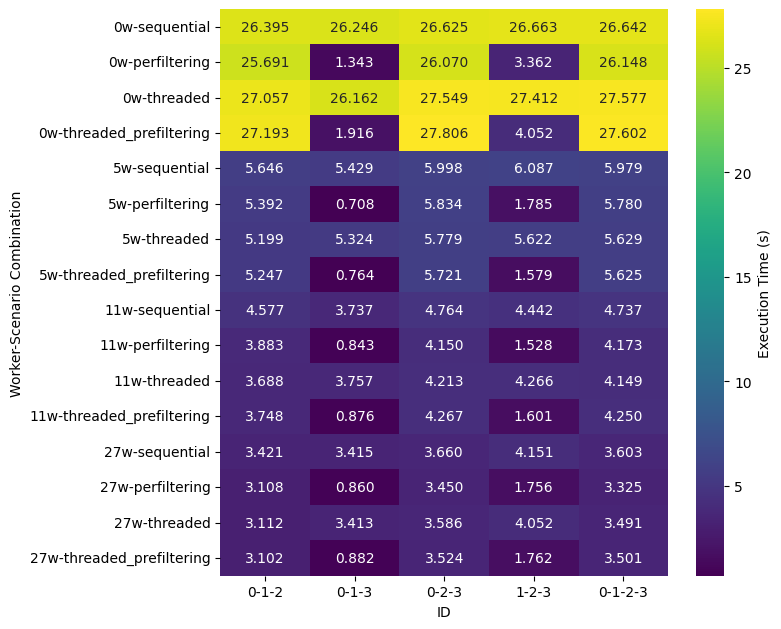

2025-07-03 13:39:33,598 - INFO -     Saved heatmap data to: figures/analysis/csv_exports/heatmap_NOT_Combinations_exact_all_20250703_133928.csv
2025-07-03 13:39:33,598 - INFO -     all heatmap stats - Mean: 6.6931s, Min: 0.3581s, Max: 27.8056s, Valid data points: 240
2025-07-03 13:39:33,598 - INFO -     all heatmap stats - Mean: 6.6931s, Min: 0.3581s, Max: 27.8056s, Valid data points: 240
2025-07-03 13:39:34,291 - INFO -     Saved heatmap: figures/analysis/NOT_Combinations_exact_all_heatmap.png
2025-07-03 13:39:34,291 - INFO -     Saved heatmap: figures/analysis/NOT_Combinations_exact_all_heatmap.png


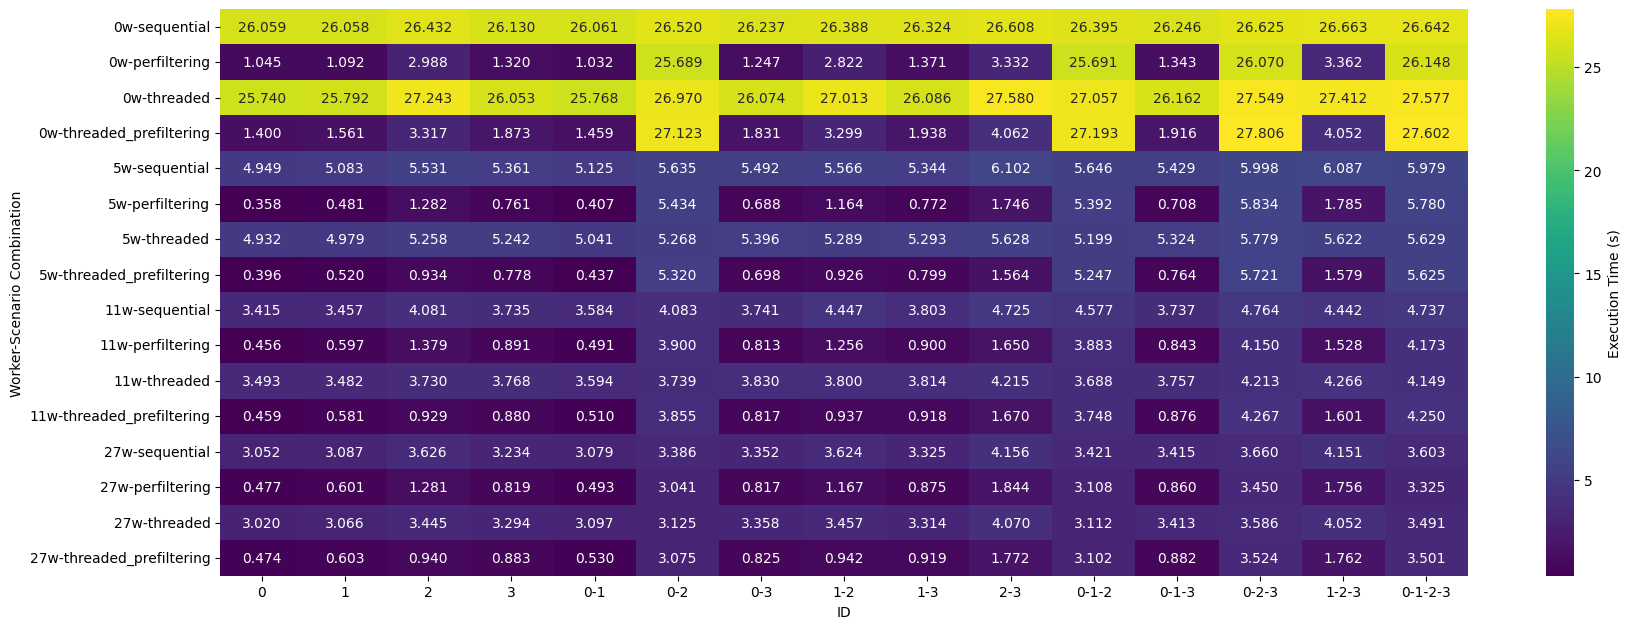

2025-07-03 13:39:34,469 - INFO - Saved NOT combinations statistics to: figures/analysis/csv_exports/not_combinations_stats_20250703_133928.csv


In [11]:
import numpy as np
import seaborn as sns

categories = ["NOT_Combinations"]
fainder_modes = df_latest["fainder_mode"].unique()

logger.info("=== NOT Combinations Heatmap Analysis ===")

# List to collect all heatmap data for CSV export
not_combinations_data = []

for category in categories:
    df_category = df_latest[df_latest["category"] == category]
    logger.info(f"Analyzing category: {category} with {len(df_category)} records")

    for fainder_mode in fainder_modes:
        df_fainder_mode = df_category[df_category["fainder_mode"] == fainder_mode]
        logger.info(f"  Fainder mode: {fainder_mode} with {len(df_fainder_mode)} records")

        unique_ids = sorted(
            df_fainder_mode["ids"].unique(), key=lambda x: (len(str(x)), str(x))
        )
        id_groups = {
            "single": [id_ for id_ in unique_ids if len(str(id_).split("-")) == 1],
            "double": [id_ for id_ in unique_ids if len(str(id_).split("-")) == 2],
            "triple": [
                id_
                for id_ in unique_ids
                if len(str(id_).split("-")) == 3 or len(str(id_).split("-")) == 4
            ],
            "all": unique_ids,
        }

        # Log ID group information
        for group_name, group_ids in id_groups.items():
            logger.info(f"    {group_name} group: {len(group_ids)} IDs")

        # Create a heatmap for each group
        for group_name, group_ids in id_groups.items():
            if not group_ids:  # Skip if no IDs in this group
                continue

            # Get unique workers and scenarios
            unique_workers = sorted(df_fainder_mode["fainder_max_workers"].unique())
            unique_scenarios = df_fainder_mode["scenario"].unique()

            # Create a pivot table for the heatmap
            # Prepare data for heatmap: rows=worker-scenario combinations, columns=IDs
            heatmap_data = []
            row_labels = []

            for worker in unique_workers:
                worker_data = df_fainder_mode[
                    df_fainder_mode["fainder_max_workers"] == worker
                ]

                for scenario in unique_scenarios:
                    scenario_data = worker_data[worker_data["scenario"] == scenario]
                    if not scenario_data.empty:
                        # Filter for current group's IDs and calculate mean execution time
                        grouped_data = (
                            scenario_data[scenario_data["ids"].isin(group_ids)]
                            .groupby("ids")["execution_time"]
                            .mean()
                        )

                        # Create row for this worker-scenario combination
                        row_values = [
                            grouped_data.get(id_, np.nan) for id_ in group_ids
                        ]
                        heatmap_data.append(row_values)
                        row_labels.append(f"{worker}w-{scenario}")

            # Convert to numpy array
            heatmap_array = np.array(heatmap_data)

            # Save heatmap data to CSV
            heatmap_df = pd.DataFrame(heatmap_array, index=row_labels, columns=group_ids)
            heatmap_csv_file = csv_dir / f"heatmap_{category}_{fainder_mode}_{group_name}_{timestamp}.csv"
            heatmap_df.to_csv(heatmap_csv_file)
            logger.info(f"    Saved heatmap data to: {heatmap_csv_file}")

            # Log heatmap statistics and collect for summary
            non_nan_values = heatmap_array[~np.isnan(heatmap_array)]
            if len(non_nan_values) > 0:
                heatmap_stats = {
                    'category': category,
                    'fainder_mode': fainder_mode,
                    'group': group_name,
                    'mean': np.mean(non_nan_values),
                    'min': np.min(non_nan_values),
                    'max': np.max(non_nan_values),
                    'std': np.std(non_nan_values),
                    'valid_points': len(non_nan_values),
                    'total_points': heatmap_array.size
                }
                not_combinations_data.append(heatmap_stats)
                
                logger.info(f"    {group_name} heatmap stats - Mean: {heatmap_stats['mean']:.4f}s, "
                           f"Min: {heatmap_stats['min']:.4f}s, "
                           f"Max: {heatmap_stats['max']:.4f}s, "
                           f"Valid data points: {heatmap_stats['valid_points']}")

            # Create the heatmap
            plt.figure(
                figsize=(max(8, len(group_ids) * 1.2), max(6, len(row_labels) * 0.4))
            )

            sns.heatmap(
                heatmap_array,
                xticklabels=group_ids,
                yticklabels=row_labels,
                annot=True,
                fmt=".3f",
                cmap="viridis",
                cbar_kws={"label": "Execution Time (s)"},
            )
            #plt.title(f"{group_name.title()} IDs - {category} - {fainder_mode}")

            plt.xlabel("ID")
            plt.ylabel("Worker-Scenario Combination")
            plt.tight_layout()
            
            filename = f"figures/analysis/{category}_{fainder_mode}_{group_name}_heatmap.png"
            plt.savefig(
                filename,
                bbox_inches="tight",
                dpi=300,
            )
            logger.info(f"    Saved heatmap: {filename}")
            plt.show()

# Save NOT combinations summary statistics to CSV
if not_combinations_data:
    not_combinations_stats_df = pd.DataFrame(not_combinations_data)
    not_combinations_stats_file = csv_dir / f"not_combinations_stats_{timestamp}.csv"
    not_combinations_stats_df.to_csv(not_combinations_stats_file, index=False)
    logger.info(f"Saved NOT combinations statistics to: {not_combinations_stats_file}")

2025-07-03 13:39:34,485 - INFO - === Execution Time Heatmaps by Fainder Mode ===
2025-07-03 13:39:34,492 - INFO - Analyzing fainder mode: full_precision with 21416 records
2025-07-03 13:39:34,492 - INFO - Analyzing fainder mode: full_precision with 21416 records
2025-07-03 13:39:34,504 - INFO -   Saved min pivot table to: figures/analysis/csv_exports/heatmap_full_precision_min_20250703_133928.csv
2025-07-03 13:39:34,505 - INFO -   Minimum heatmap - Overall min: 0.0049s
2025-07-03 13:39:34,504 - INFO -   Saved min pivot table to: figures/analysis/csv_exports/heatmap_full_precision_min_20250703_133928.csv
2025-07-03 13:39:34,505 - INFO -   Minimum heatmap - Overall min: 0.0049s
2025-07-03 13:39:34,505 - INFO -     Worker 0: 0.0049s
2025-07-03 13:39:34,505 - INFO -     Worker 5: 0.0056s
2025-07-03 13:39:34,506 - INFO -     Worker 11: 0.0054s
2025-07-03 13:39:34,506 - INFO -     Worker 27: 0.0053s
2025-07-03 13:39:34,505 - INFO -     Worker 0: 0.0049s
2025-07-03 13:39:34,505 - INFO -     W

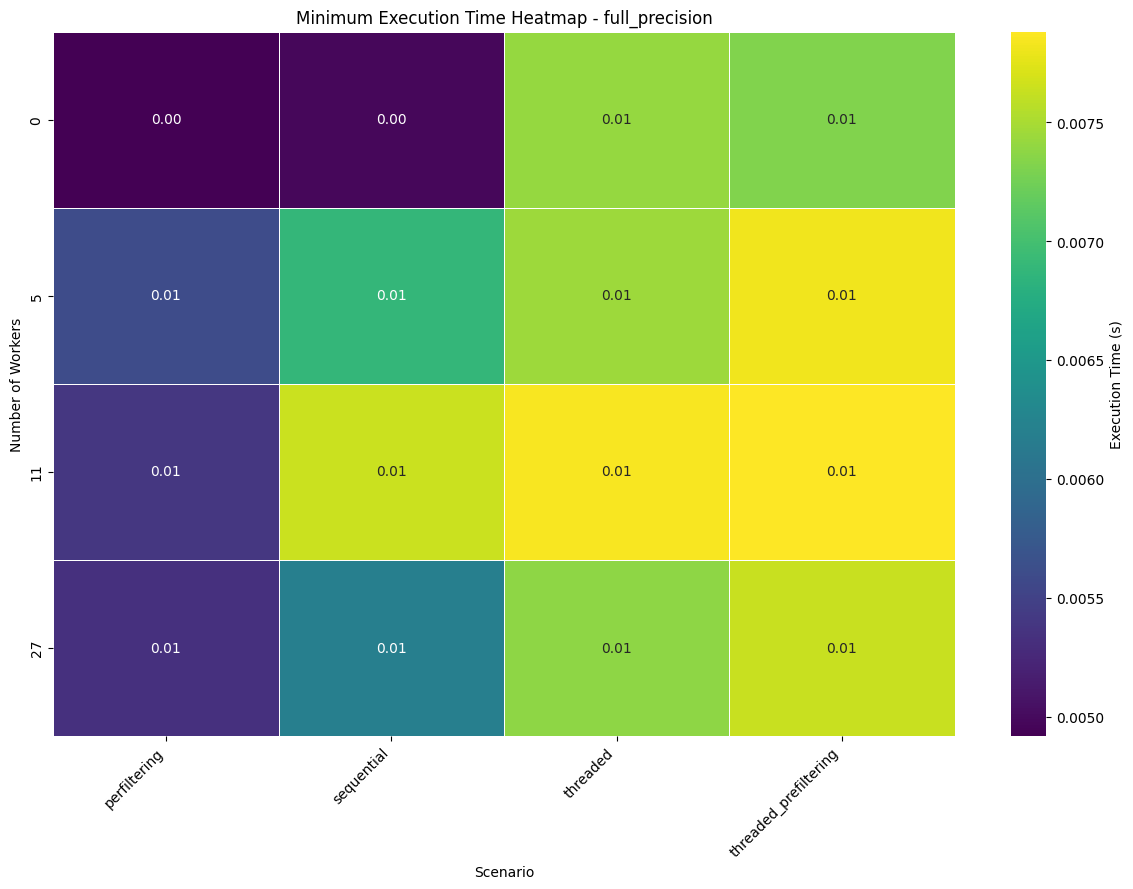

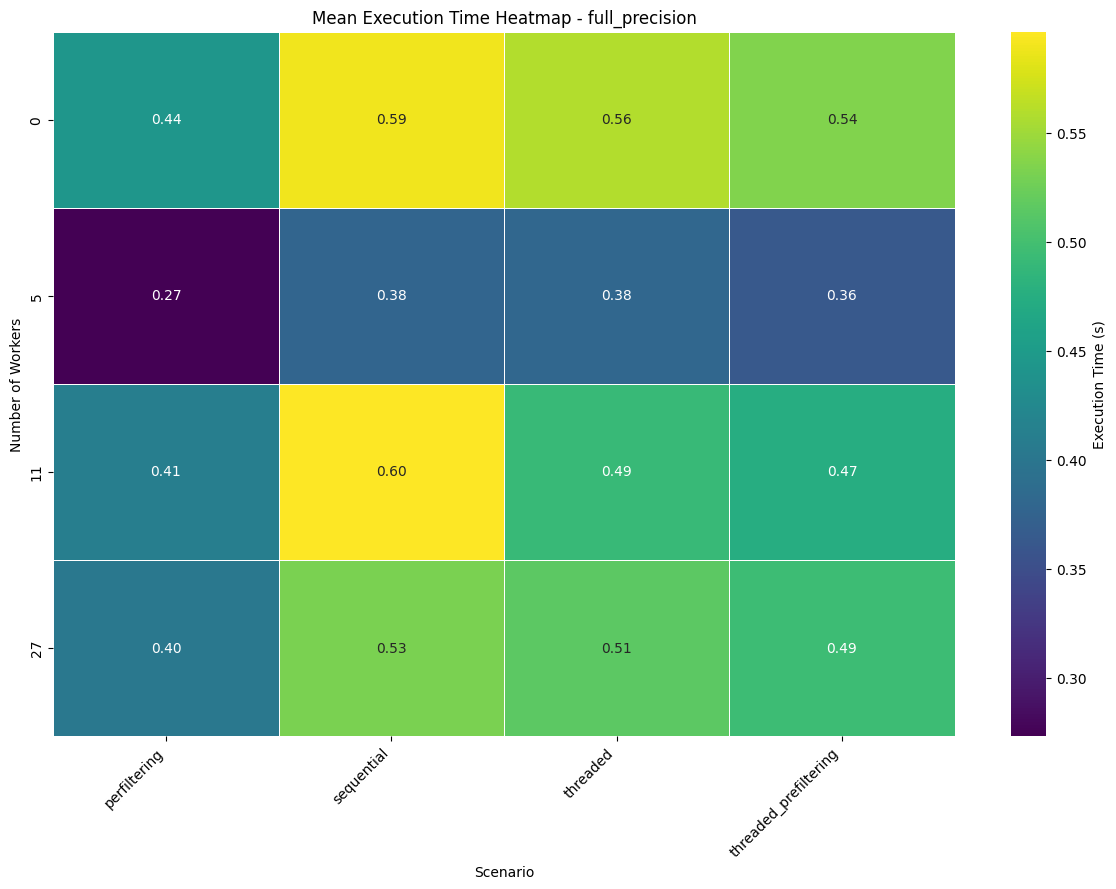

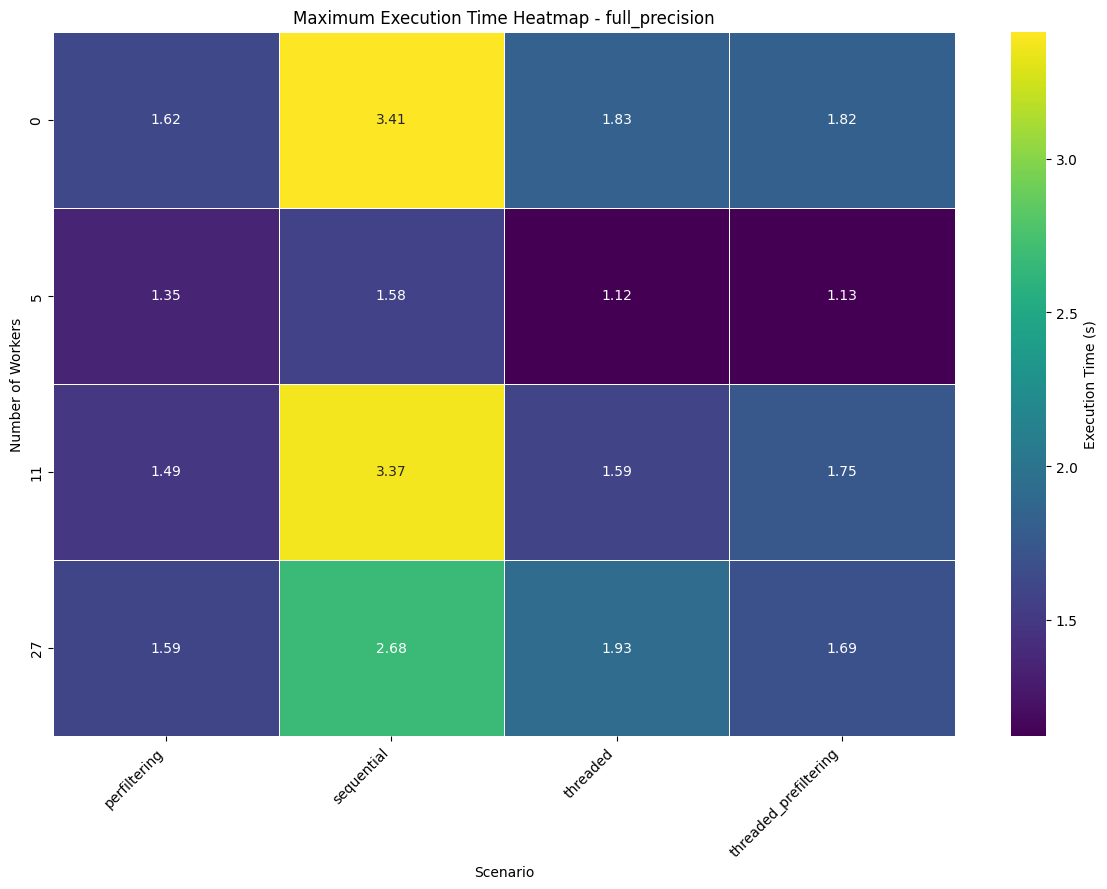

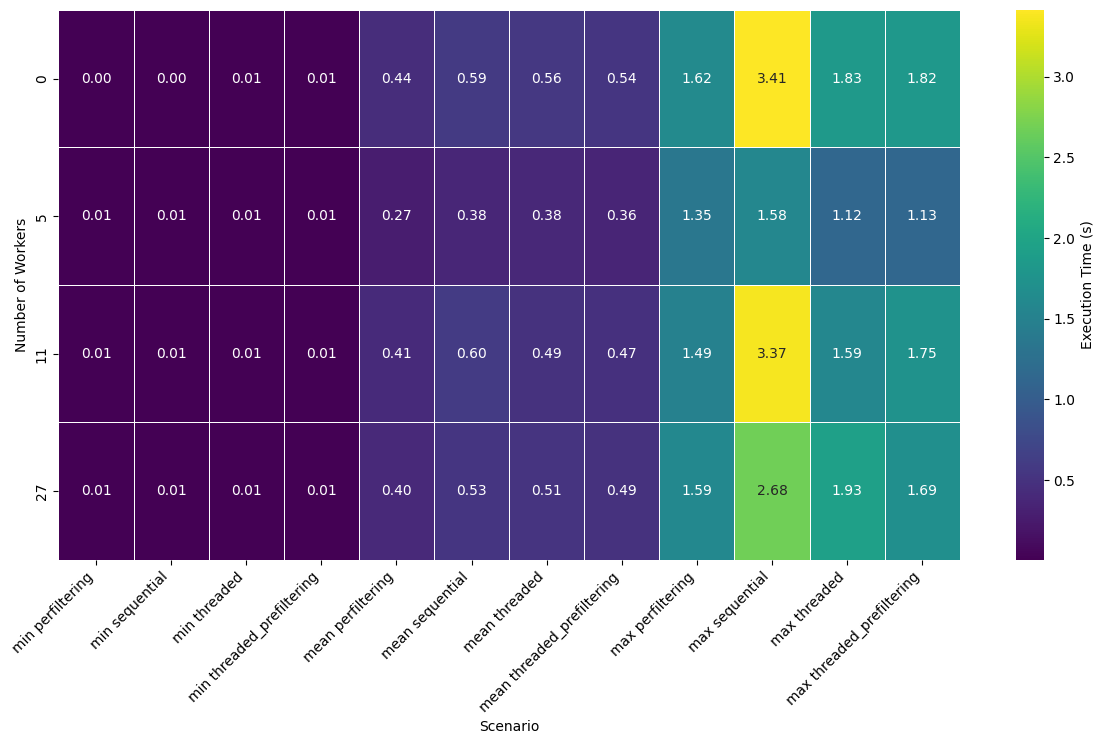

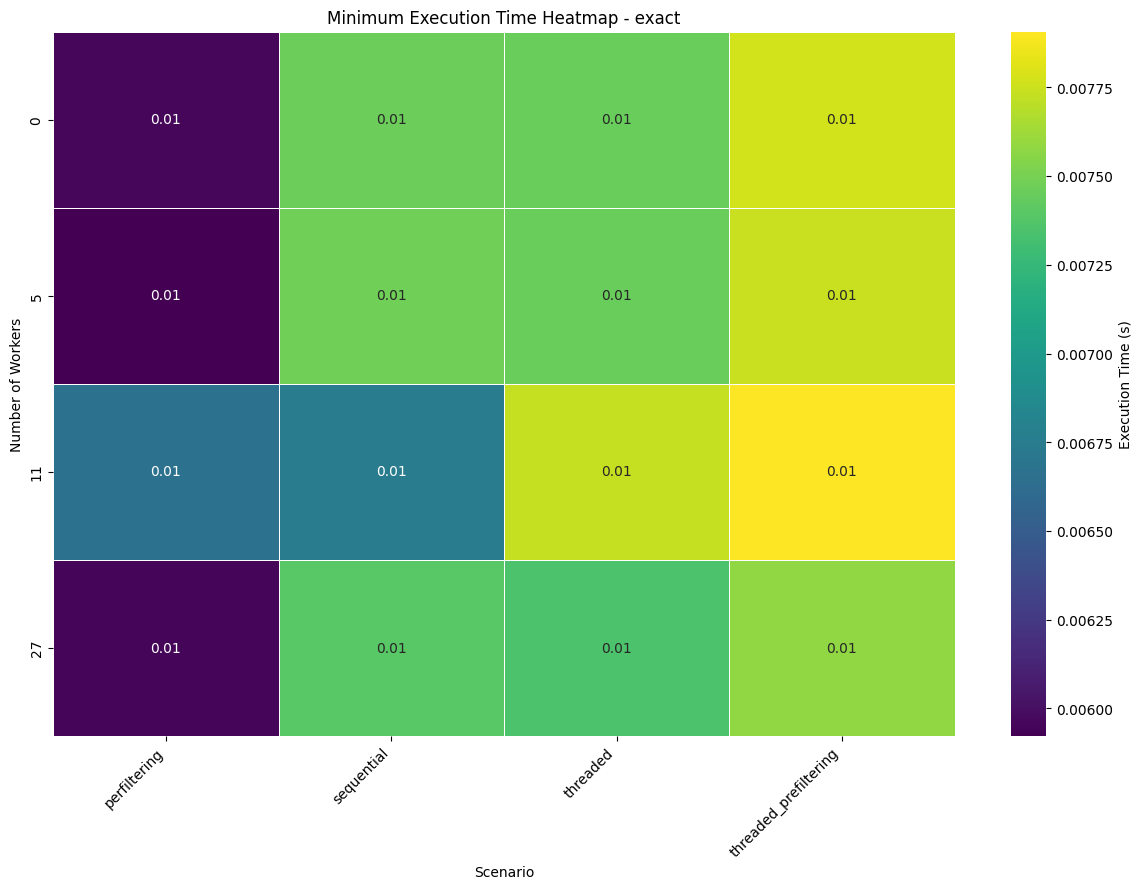

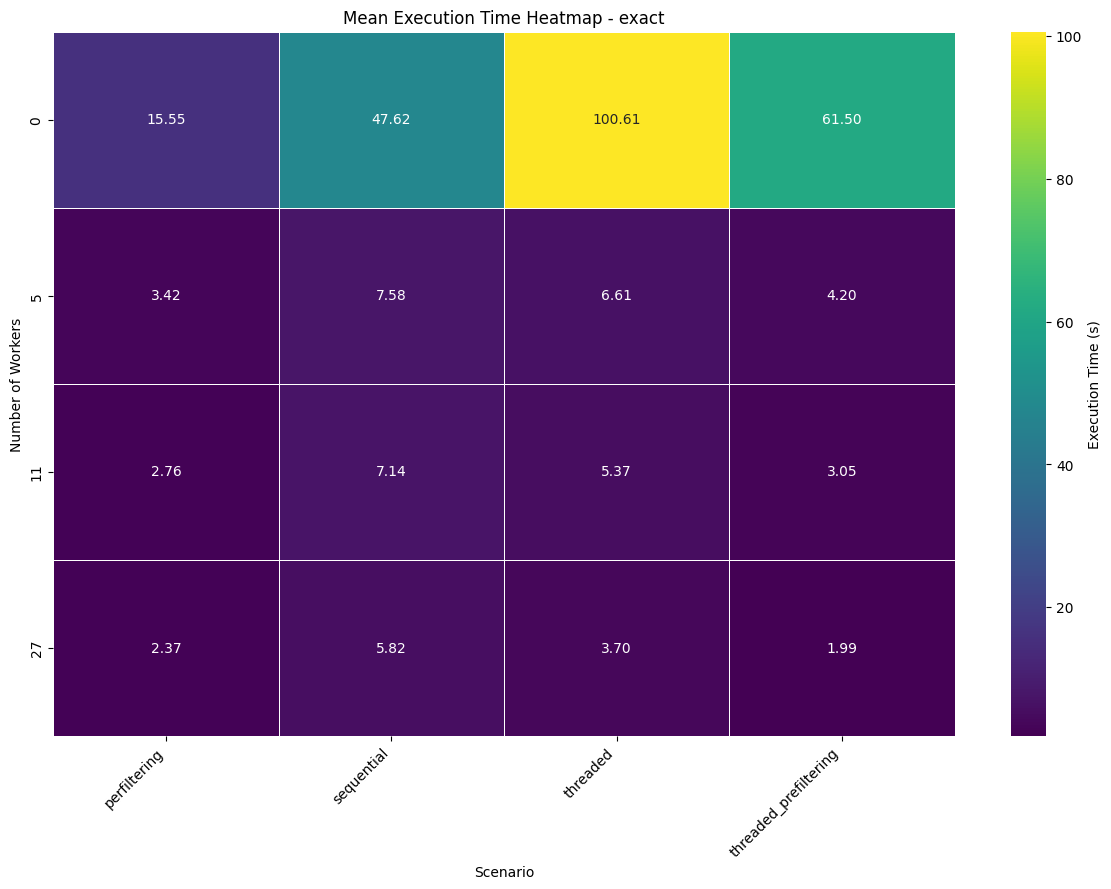

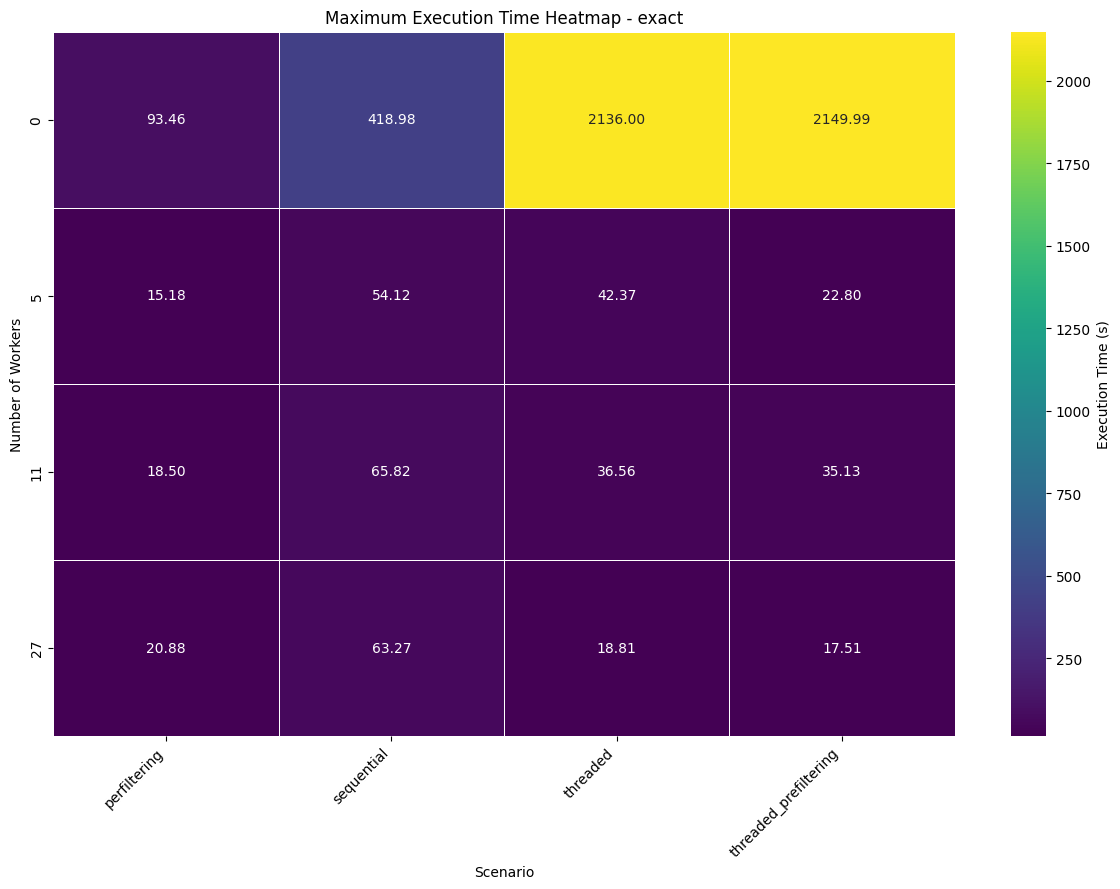

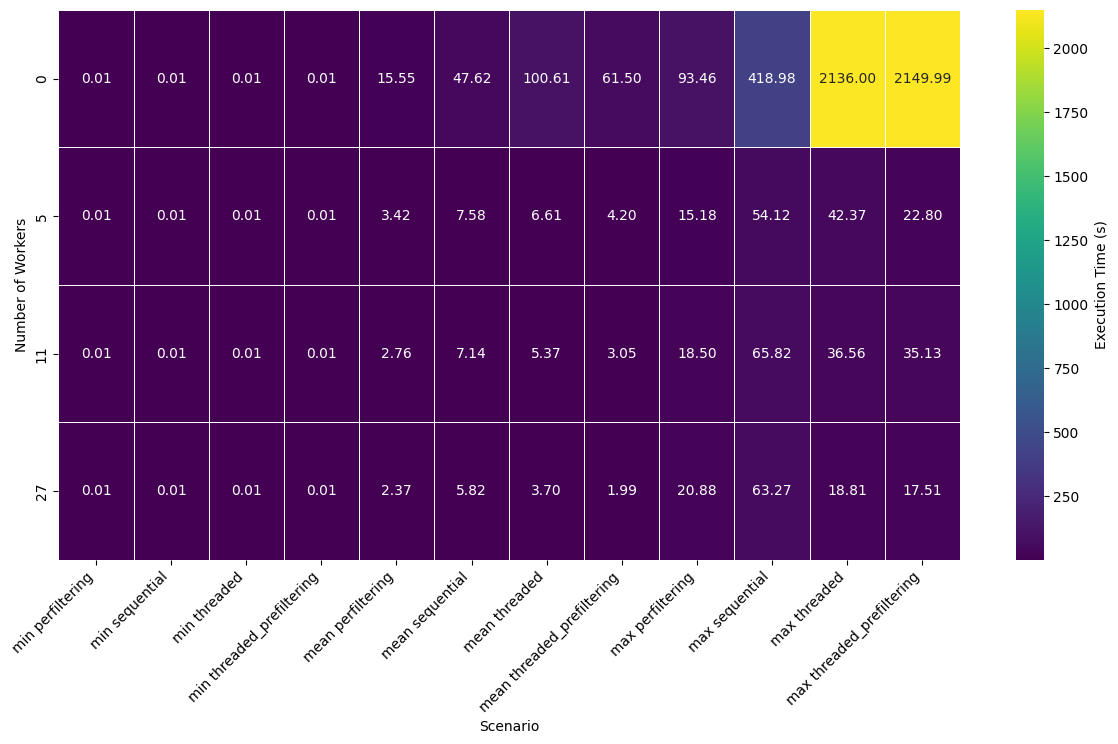

In [12]:
# Compare execution time (as heatmap) against scenario and num_workers for one plot per fainder mode

import numpy as np
import seaborn as sns

logger.info("=== Execution Time Heatmaps by Fainder Mode ===")

# List to collect all heatmap statistics for CSV export
execution_time_heatmap_stats = []

for fainder_mode in df_latest["fainder_mode"].unique():
    df_fainder_mode = df_latest[df_latest["fainder_mode"] == fainder_mode]
    logger.info(f"Analyzing fainder mode: {fainder_mode} with {len(df_fainder_mode)} records")

    # Also create separate heatmaps for the min, mean and max values
    for stat, title_suffix in [
        ("min", "Minimum"),
        ("mean", "Mean"),
        ("max", "Maximum"),
    ]:
        plt.figure(figsize=(12, 8))
        plt.title(f"{title_suffix} Execution Time Heatmap - {fainder_mode}")

        pivot_stat = df_fainder_mode.pivot_table(
            index="fainder_max_workers",
            columns="scenario",
            values="execution_time",
            aggfunc=stat,
        ).sort_index()

        # Save pivot table to CSV
        pivot_csv_file = csv_dir / f"heatmap_{fainder_mode}_{stat}_{timestamp}.csv"
        pivot_stat.to_csv(pivot_csv_file)
        logger.info(f"  Saved {stat} pivot table to: {pivot_csv_file}")

        # Log statistics for this pivot table
        valid_values = pivot_stat.values[~np.isnan(pivot_stat.values)]
        if len(valid_values) > 0:
            if stat == 'mean':
                overall_stat_value = np.mean(valid_values)
            elif stat == 'min':
                overall_stat_value = np.min(valid_values)
            else:  # max
                overall_stat_value = np.max(valid_values)
            
            logger.info(f"  {title_suffix} heatmap - Overall {stat}: {overall_stat_value:.4f}s")
            
            # Collect overall statistics
            heatmap_overall_stats = {
                'fainder_mode': fainder_mode,
                'statistic': stat,
                'overall_value': overall_stat_value,
                'data_points': len(valid_values),
                'mean_of_values': np.mean(valid_values),
                'std_of_values': np.std(valid_values)
            }
            execution_time_heatmap_stats.append(heatmap_overall_stats)
            
            # Log per-worker statistics
            for worker in pivot_stat.index:
                worker_values = pivot_stat.loc[worker].dropna()
                if len(worker_values) > 0:
                    if stat == 'mean':
                        worker_stat = worker_values.mean()
                    elif stat == 'min':
                        worker_stat = worker_values.min()
                    else:  # max
                        worker_stat = worker_values.max()
                    logger.info(f"    Worker {worker}: {worker_stat:.4f}s")

        sns.heatmap(
            pivot_stat,
            annot=True,
            fmt=".2f",
            cmap="viridis",
            linewidths=0.5,
            cbar_kws={"label": "Execution Time (s)"},
        )

        plt.ylabel("Number of Workers")
        plt.xlabel("Scenario")
        plt.tight_layout()
        plt.xticks(rotation=45, ha="right")

        filename = f"figures/analysis/heatmap_{fainder_mode}_{stat}.png"
        plt.savefig(filename)
        logger.info(f"  Saved {stat} heatmap: {filename}")

    # Create a combined heatmap for the min, mean and max values
    plt.figure(figsize=(12, 8))
    #plt.title(f"Combined Execution Time Heatmap - {fainder_mode}")
    pivot_combined = df_fainder_mode.pivot_table(
        index="fainder_max_workers",
        columns="scenario",
        values="execution_time",
        aggfunc=["min", "mean", "max"],
    )
    pivot_combined.columns = [f"{stat} {col}" for stat, col in pivot_combined.columns]
    
    # Save combined pivot table to CSV
    combined_csv_file = csv_dir / f"heatmap_combined_{fainder_mode}_{timestamp}.csv"
    pivot_combined.to_csv(combined_csv_file)
    logger.info(f"  Saved combined pivot table to: {combined_csv_file}")
    
    # Log combined statistics
    logger.info(f"  Combined heatmap statistics:")
    for stat in ["min", "mean", "max"]:
        stat_columns = [col for col in pivot_combined.columns if col.startswith(stat)]
        if stat_columns:
            stat_values = pivot_combined[stat_columns].values.flatten()
            stat_values = stat_values[~np.isnan(stat_values)]
            if len(stat_values) > 0:
                logger.info(f"    {stat.title()}: mean={np.mean(stat_values):.4f}s, "
                           f"min={np.min(stat_values):.4f}s, max={np.max(stat_values):.4f}s")
    
    sns.heatmap(
        pivot_combined,
        annot=True,
        fmt=".2f",
        cmap="viridis",
        linewidths=0.5,
        cbar_kws={"label": "Execution Time (s)"},
    )
    plt.ylabel("Number of Workers")
    plt.xlabel("Scenario")
    plt.tight_layout()
    plt.xticks(rotation=45, ha="right")
    
    filename = f"figures/analysis/heatmap_combined_{fainder_mode}.png"
    plt.savefig(filename)
    logger.info(f"  Saved combined heatmap: {filename}")

# Save execution time heatmap statistics to CSV
if execution_time_heatmap_stats:
    execution_time_stats_df = pd.DataFrame(execution_time_heatmap_stats)
    execution_time_stats_file = csv_dir / f"execution_time_heatmap_stats_{timestamp}.csv"
    execution_time_stats_df.to_csv(execution_time_stats_file, index=False)
    logger.info(f"Saved execution time heatmap statistics to: {execution_time_stats_file}")

2025-07-03 13:39:36,266 - INFO - === Execution Time Analysis by Workers and Scenario ===
2025-07-03 13:39:36,270 - INFO - Analyzing category: base_keyword_queries with 1280 records
2025-07-03 13:39:36,272 - INFO -   Fainder mode: exact with 640 records
2025-07-03 13:39:36,270 - INFO - Analyzing category: base_keyword_queries with 1280 records
2025-07-03 13:39:36,272 - INFO -   Fainder mode: exact with 640 records


2025-07-03 13:39:36,275 - INFO -       0 workers, perfiltering: mean=0.2037s, min=0.0060s, max=0.5591s (n=50)
2025-07-03 13:39:36,277 - INFO -       0 workers, sequential: mean=0.2102s, min=0.0075s, max=0.5537s (n=50)
2025-07-03 13:39:36,284 - INFO -       0 workers, threaded: mean=0.2207s, min=0.0075s, max=0.5614s (n=50)
2025-07-03 13:39:36,286 - INFO -       0 workers, threaded_prefiltering: mean=0.2224s, min=0.0078s, max=0.5596s (n=50)
2025-07-03 13:39:36,288 - INFO -       5 workers, perfiltering: mean=0.2060s, min=0.0059s, max=0.5502s (n=50)
2025-07-03 13:39:36,290 - INFO -       5 workers, sequential: mean=0.2117s, min=0.0075s, max=0.5494s (n=50)
2025-07-03 13:39:36,277 - INFO -       0 workers, sequential: mean=0.2102s, min=0.0075s, max=0.5537s (n=50)
2025-07-03 13:39:36,284 - INFO -       0 workers, threaded: mean=0.2207s, min=0.0075s, max=0.5614s (n=50)
2025-07-03 13:39:36,286 - INFO -       0 workers, threaded_prefiltering: mean=0.2224s, min=0.0078s, max=0.5596s (n=50)
2025-0

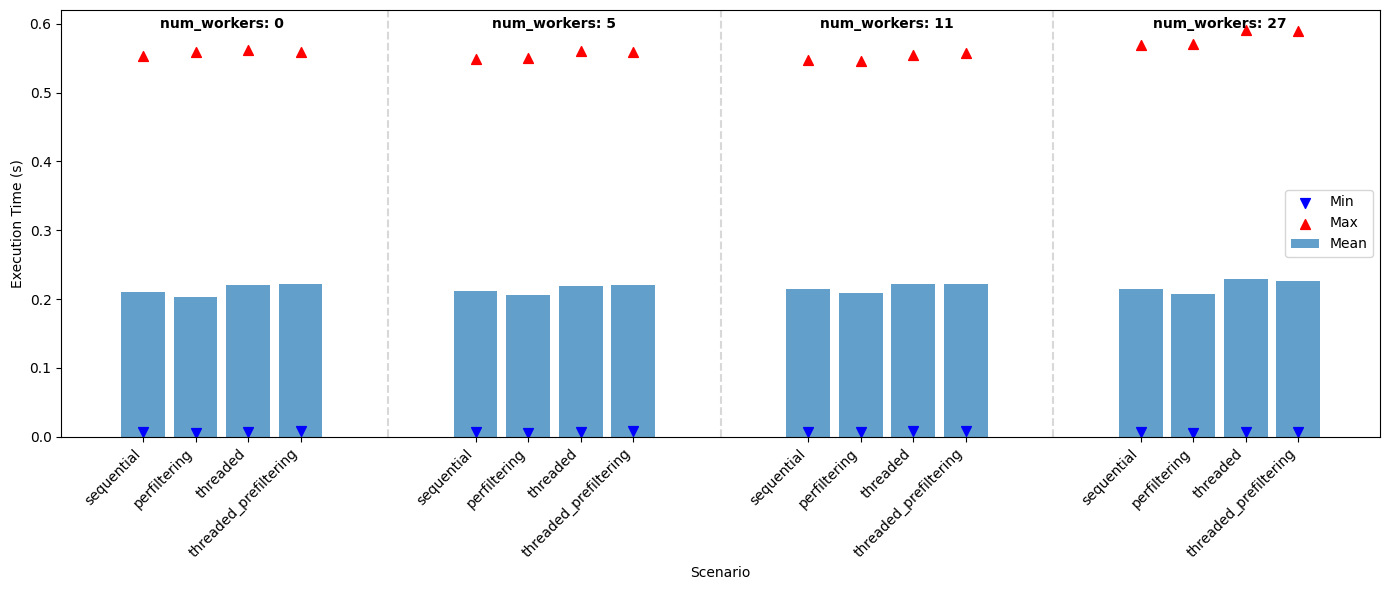

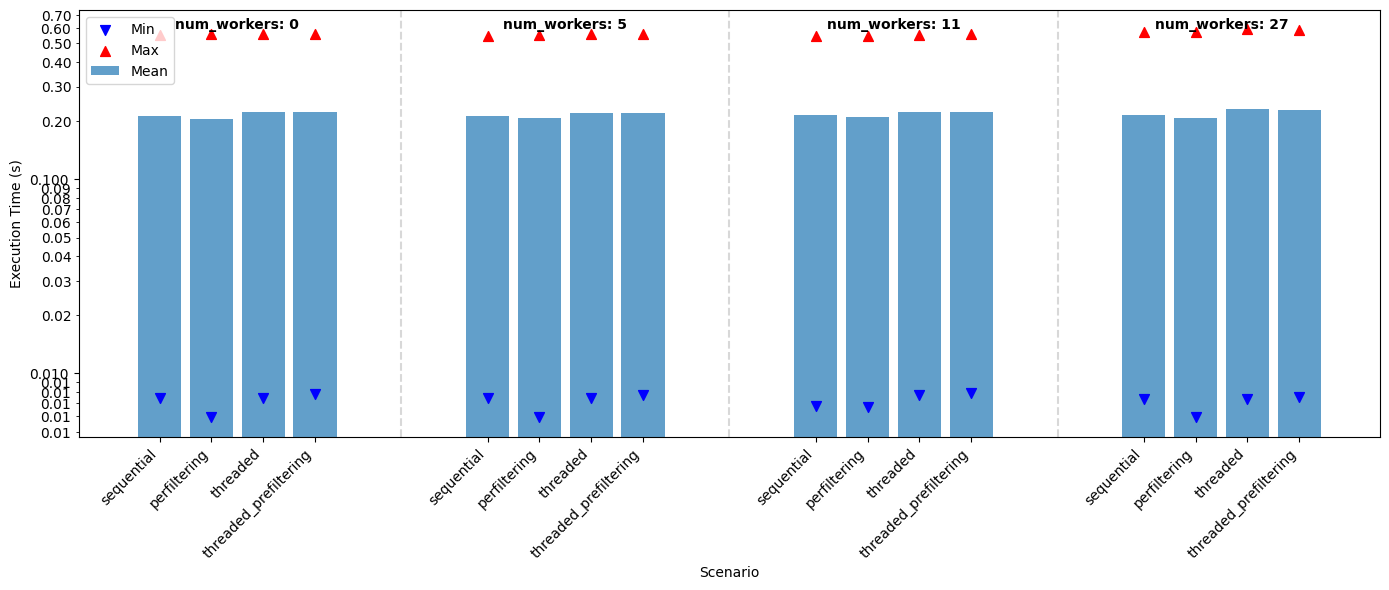

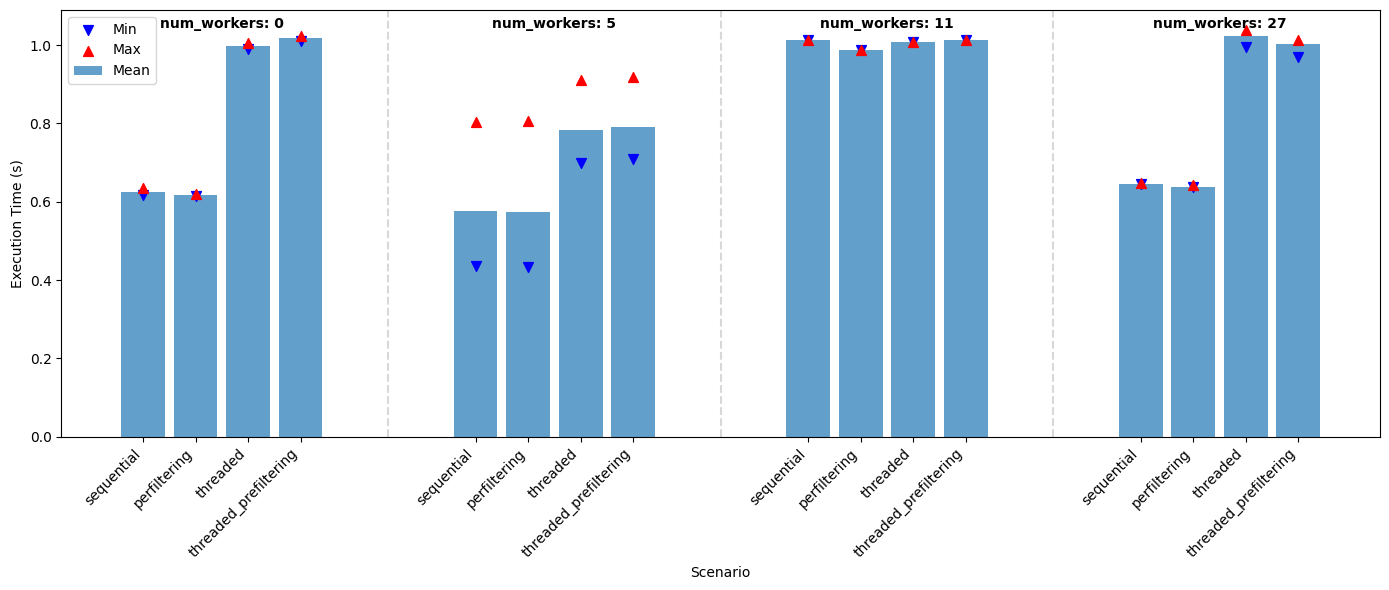

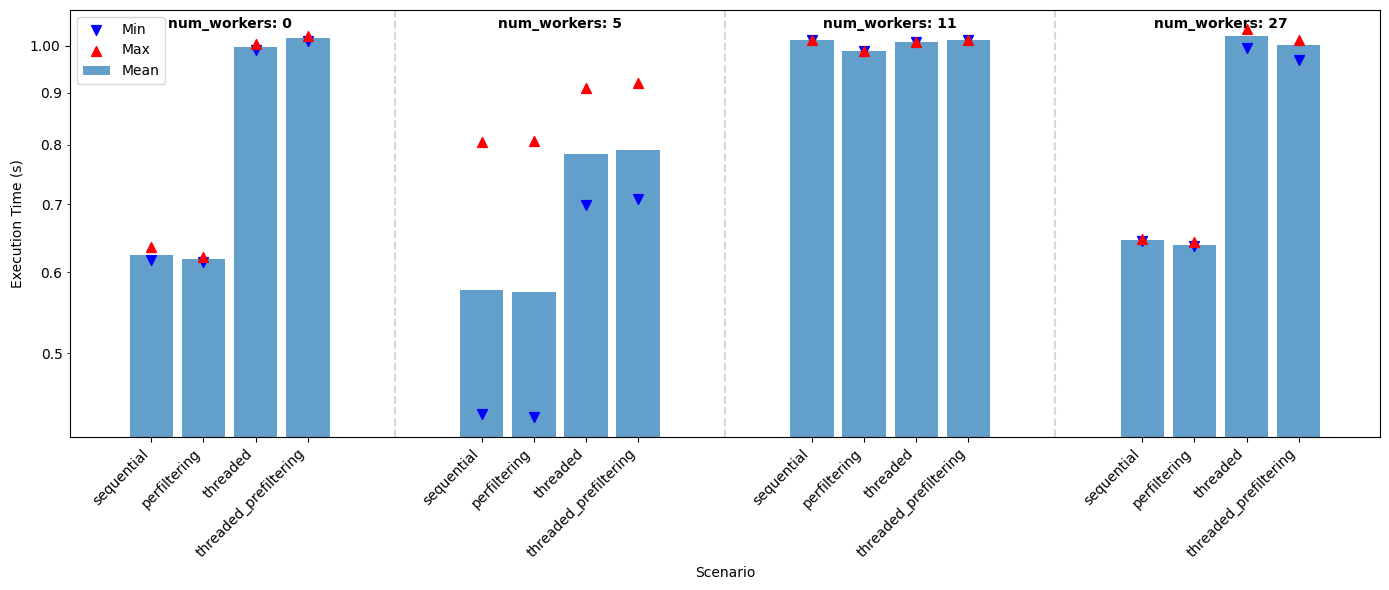

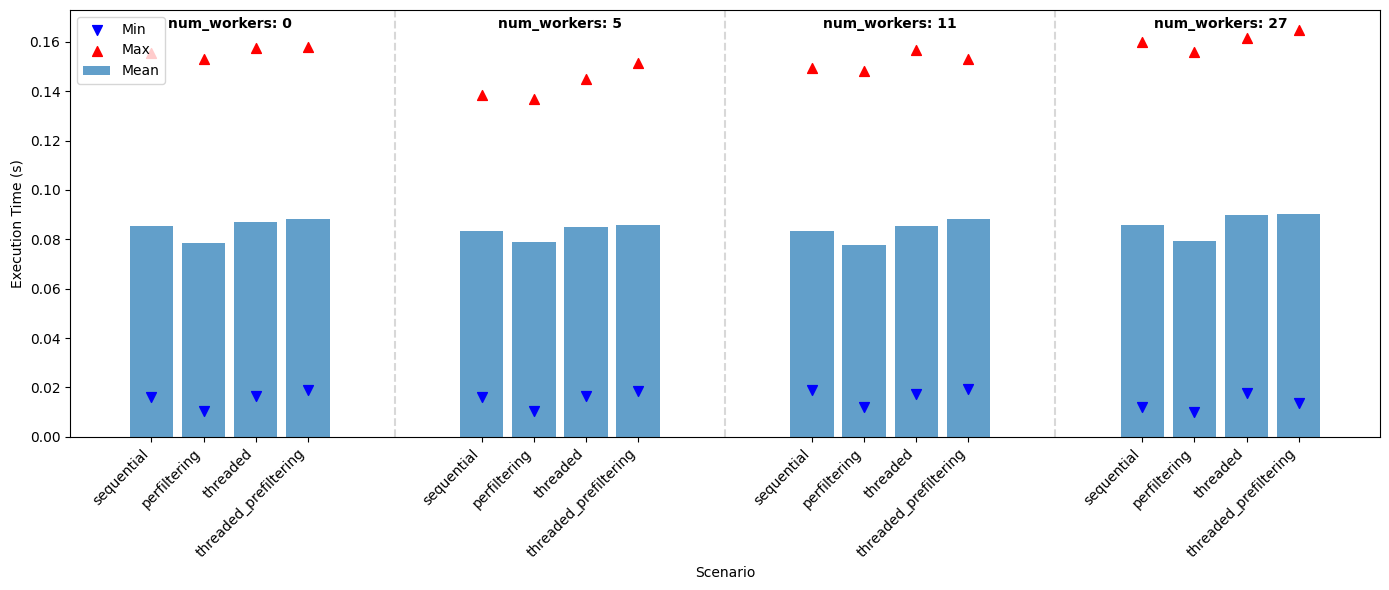

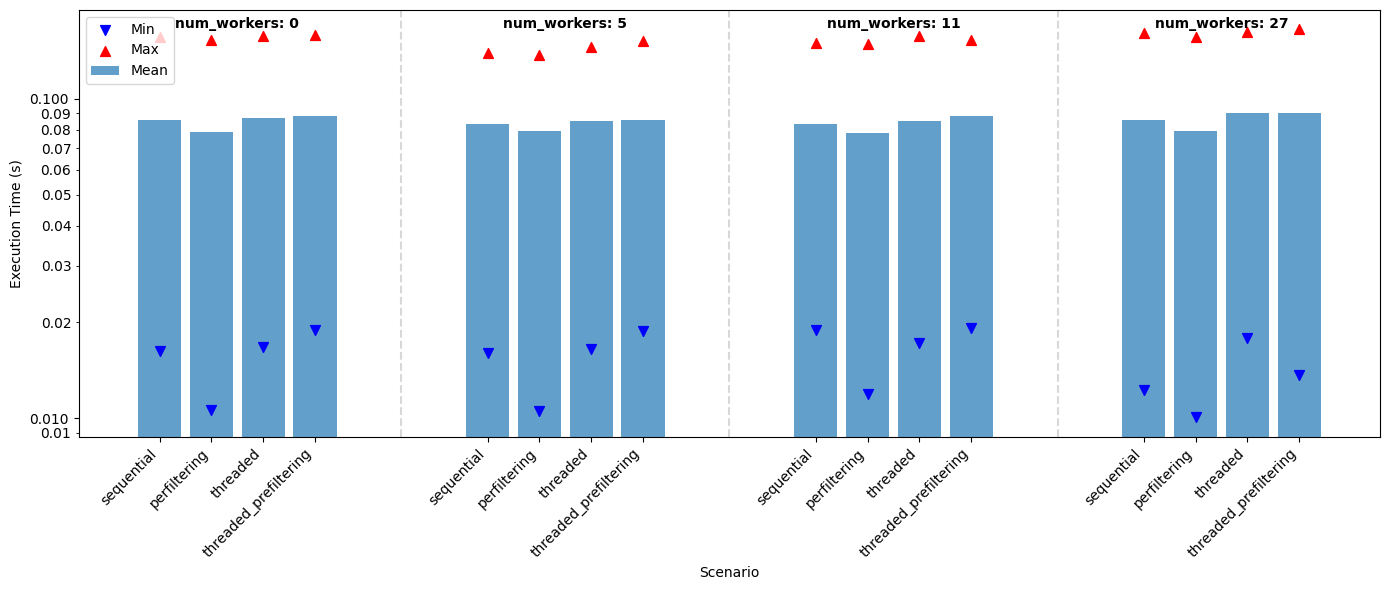

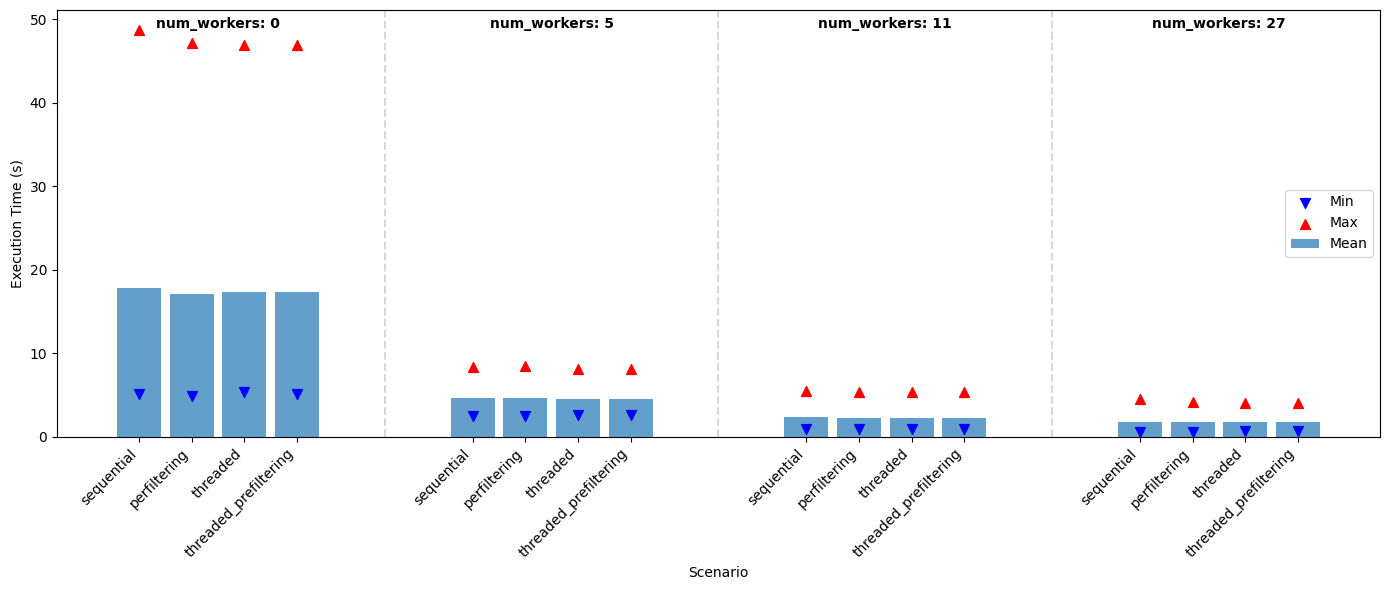

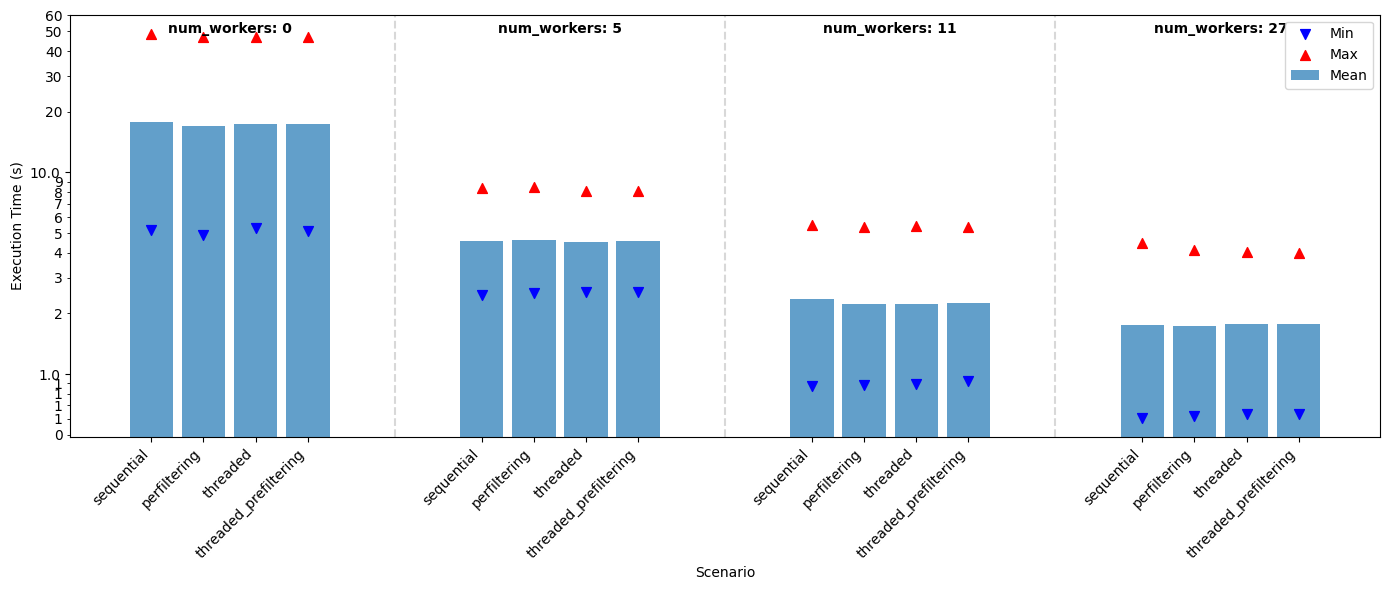

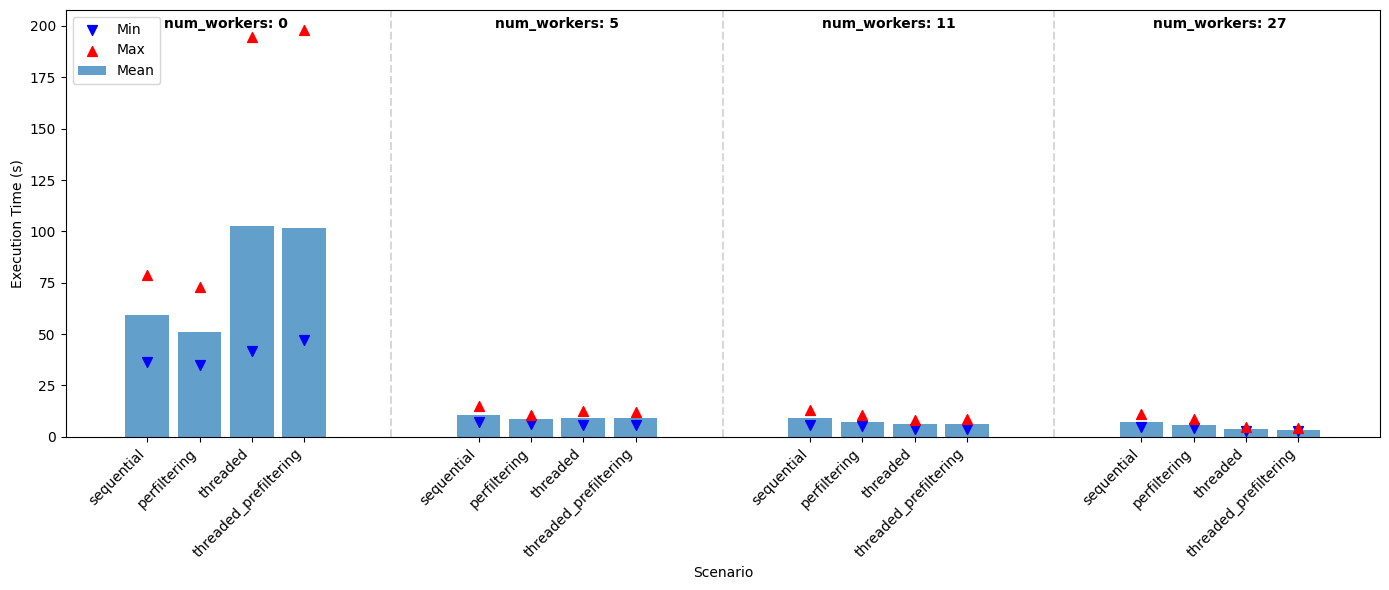

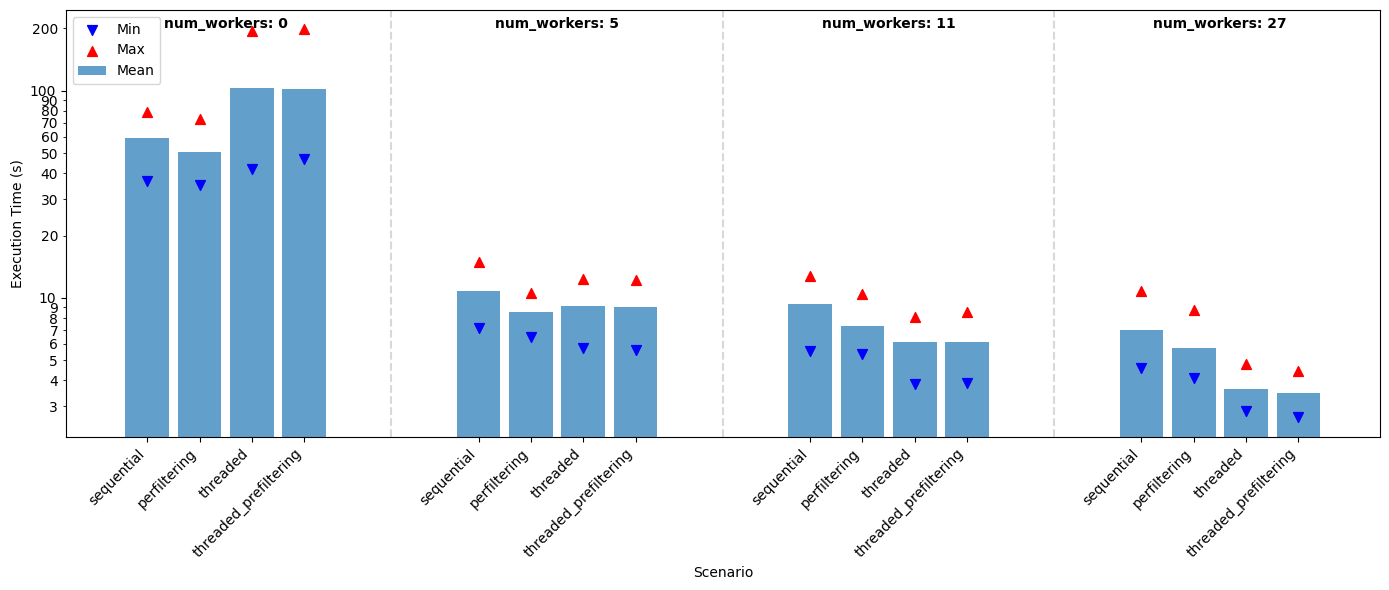

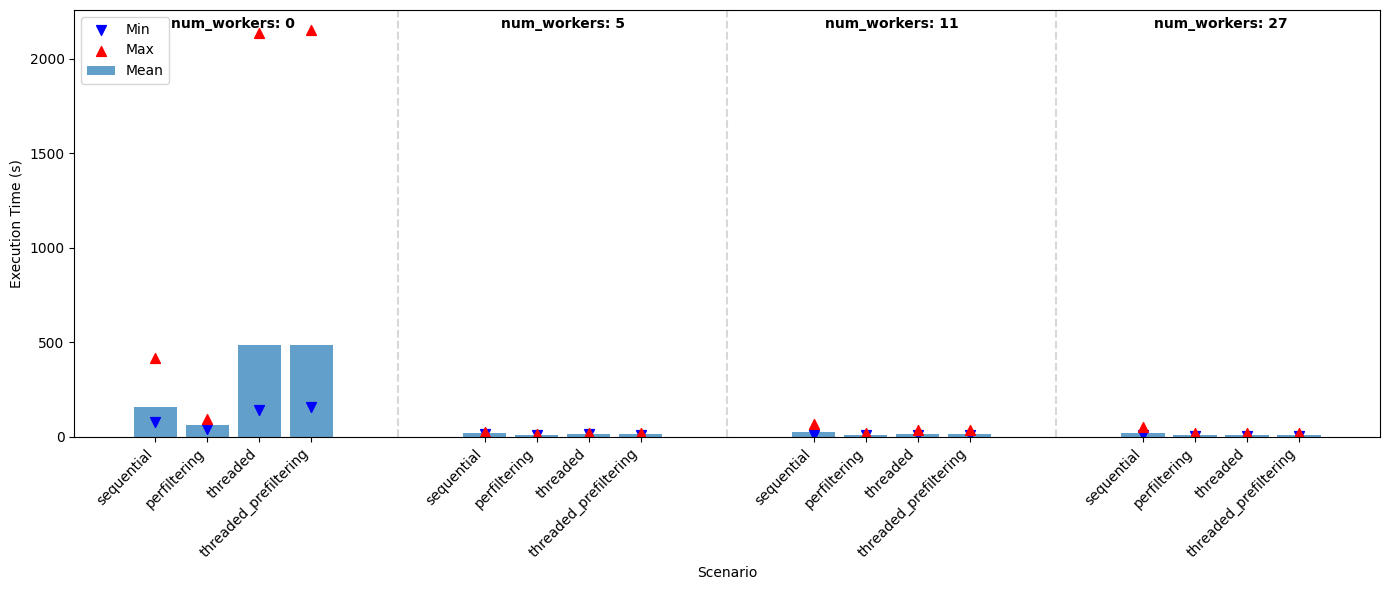

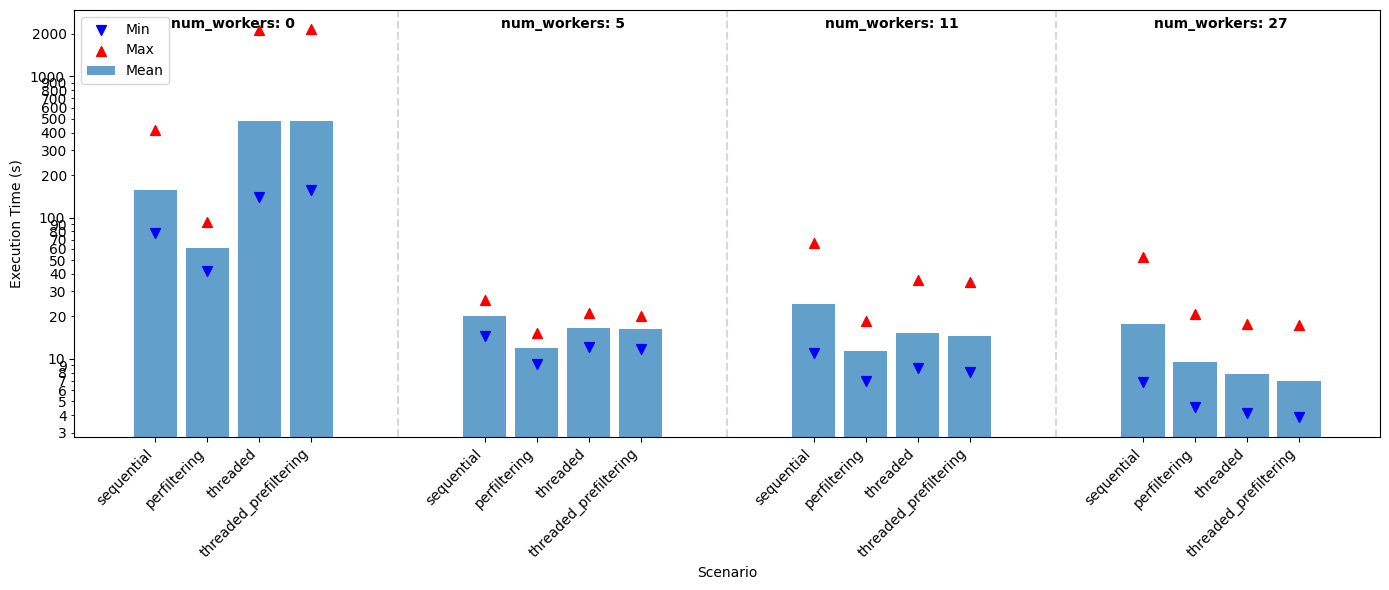

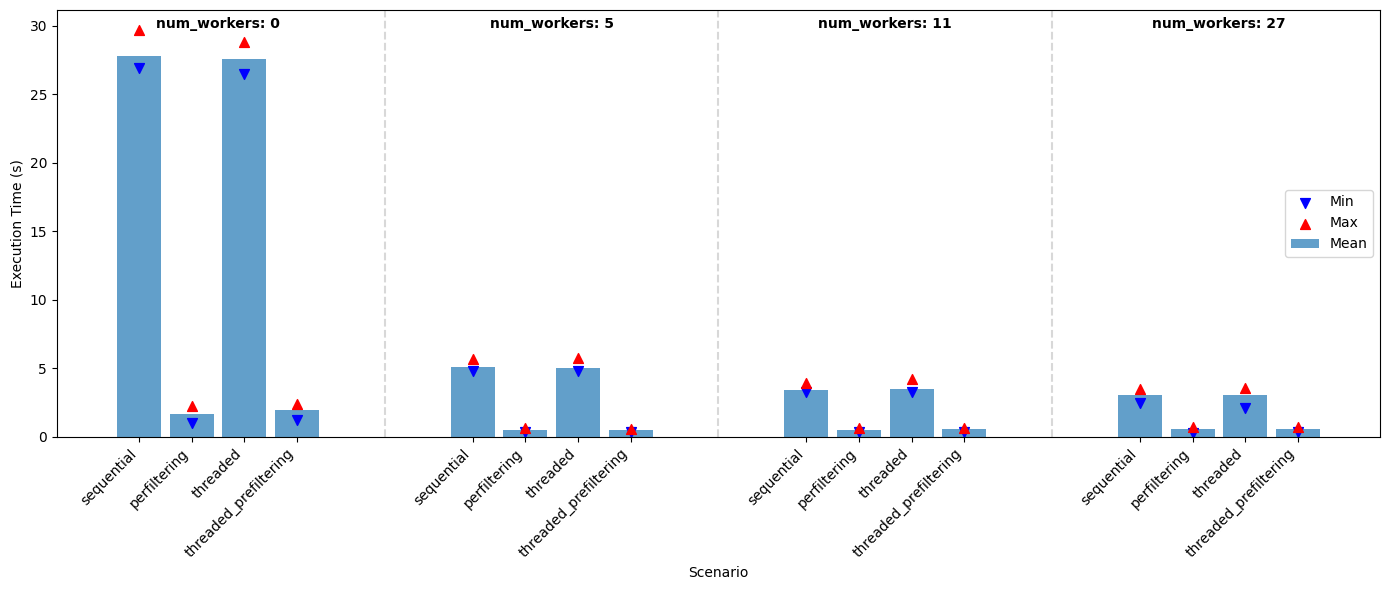

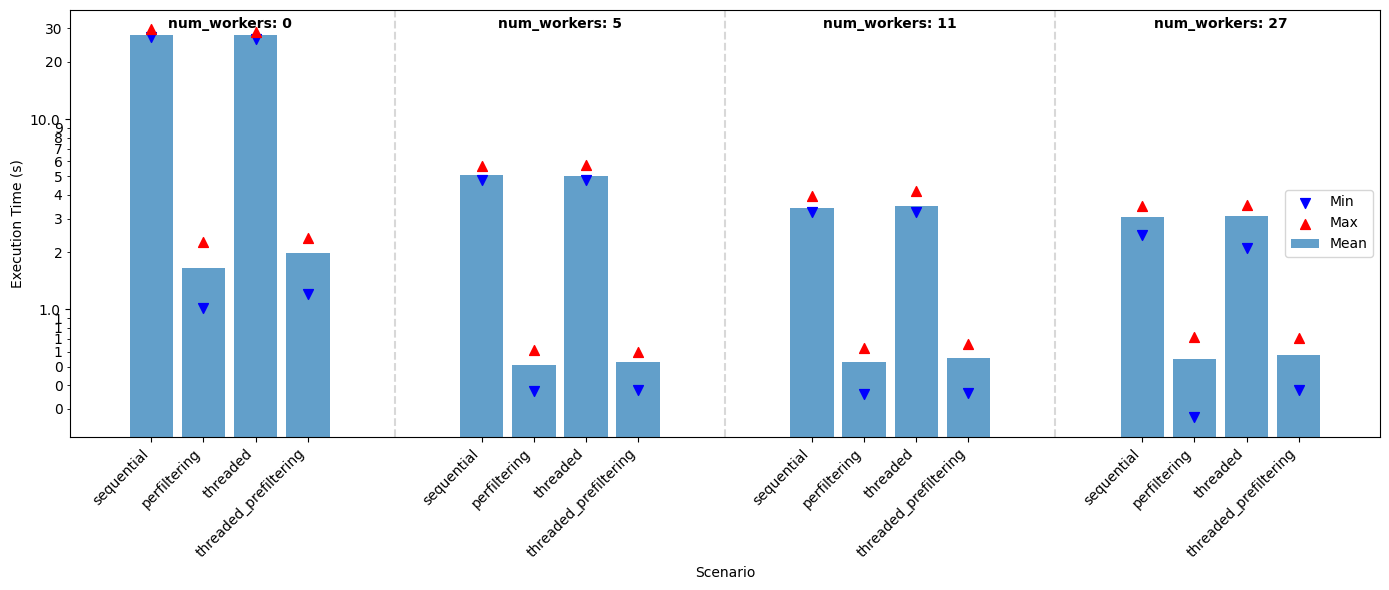

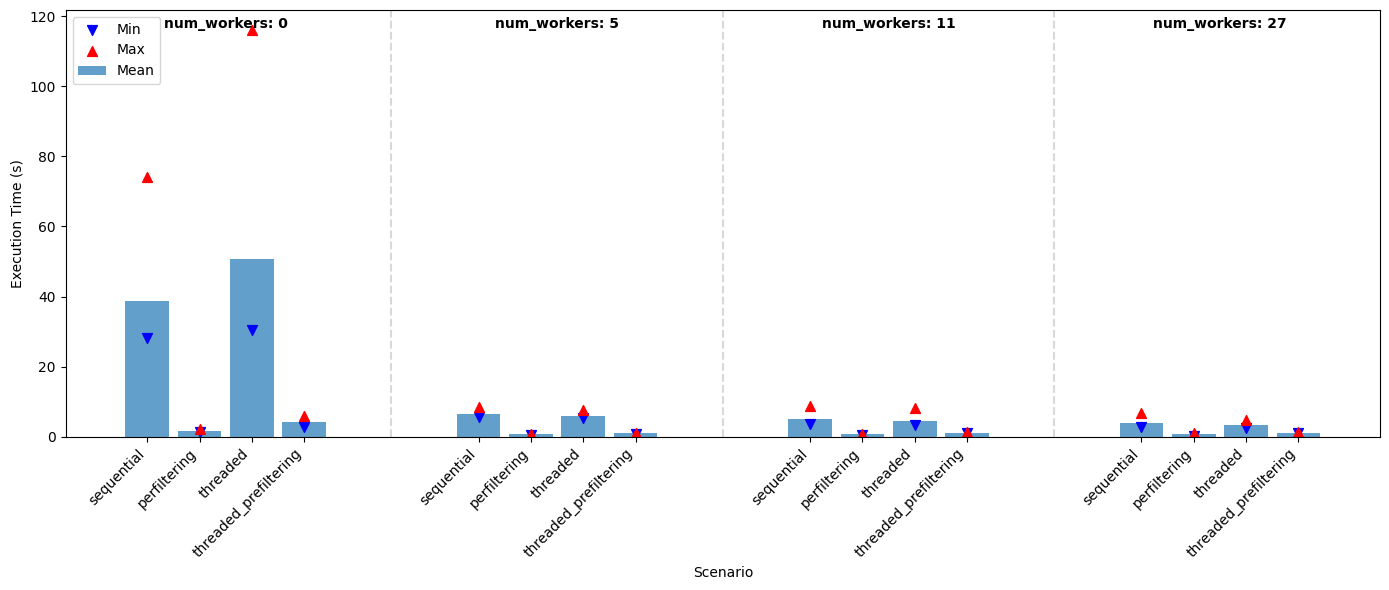

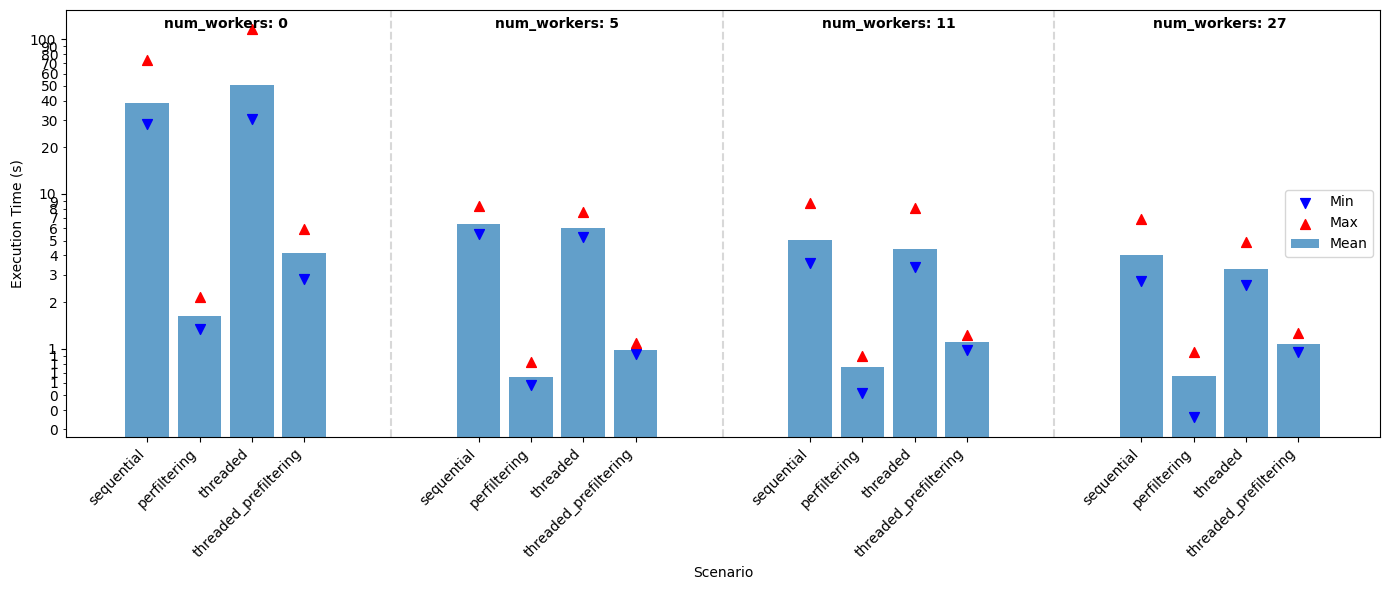

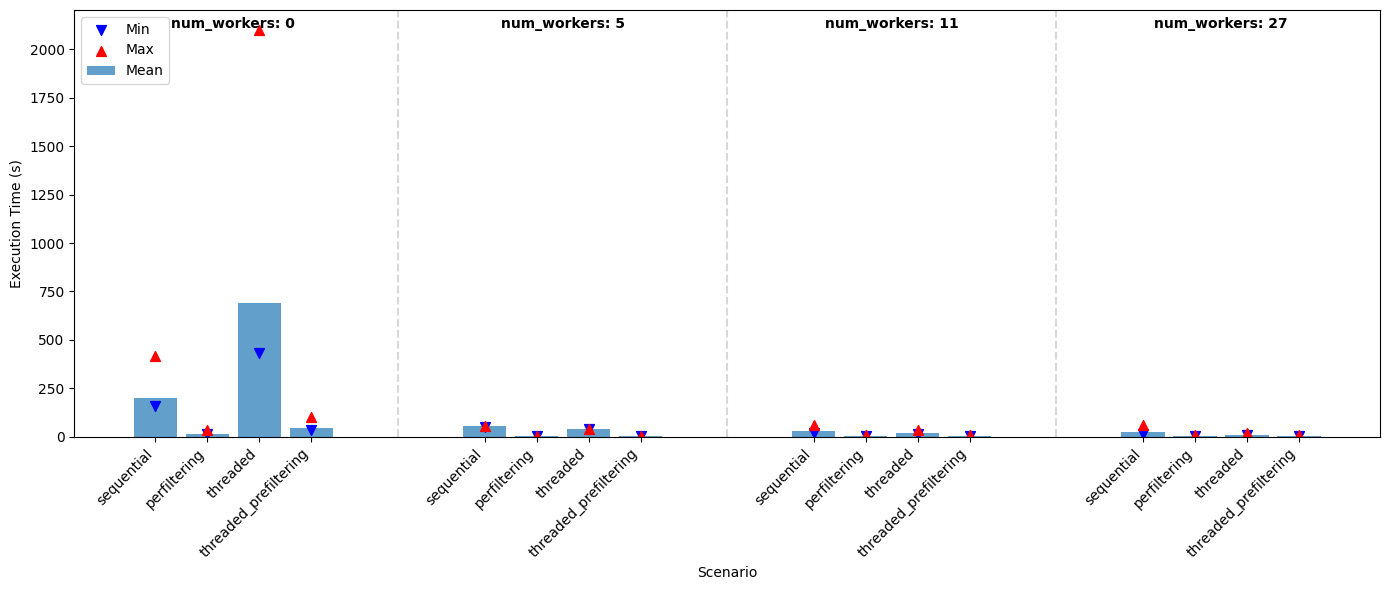

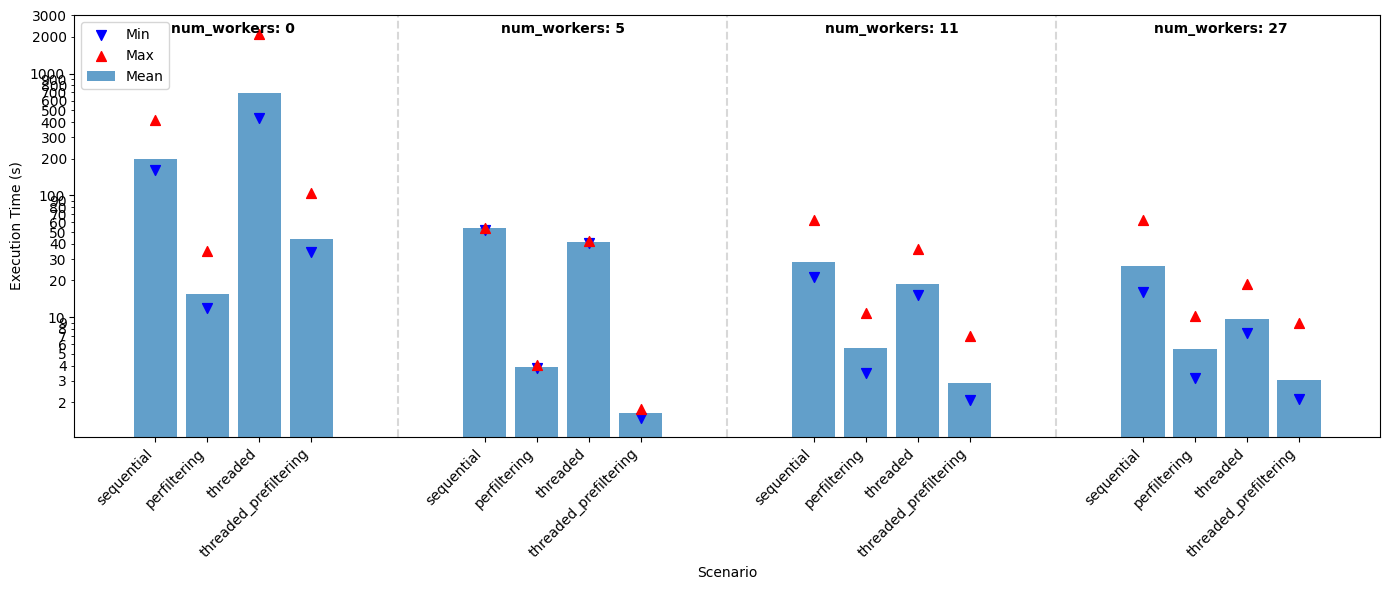

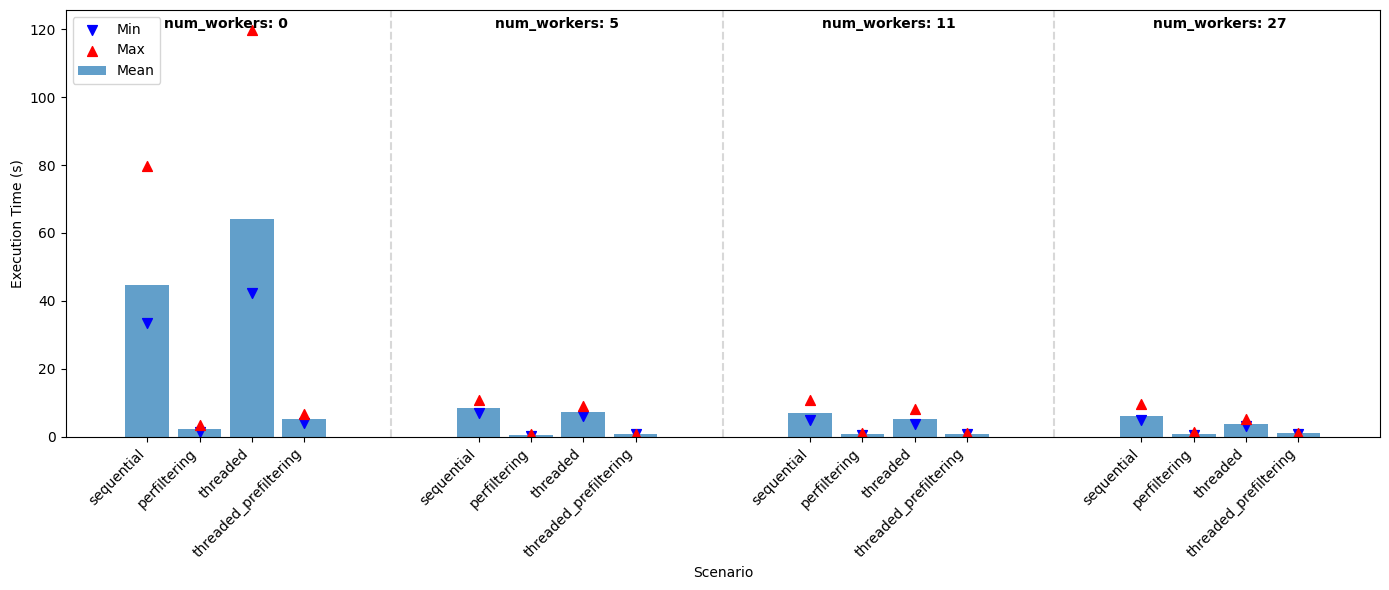

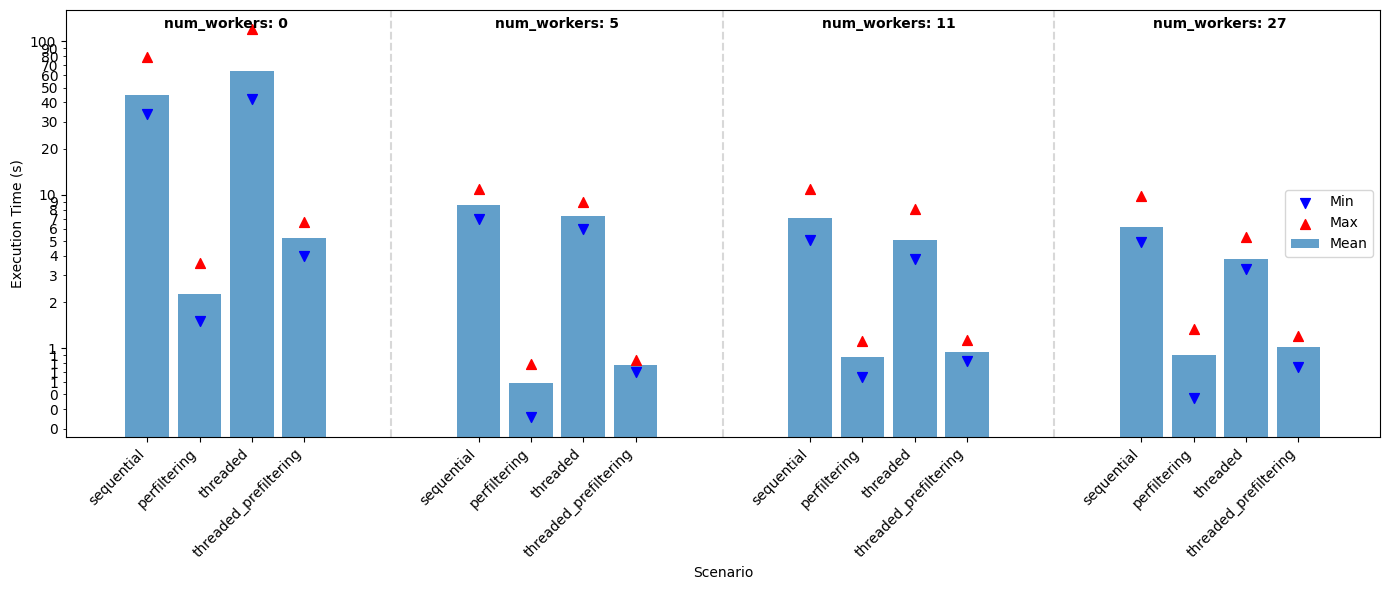

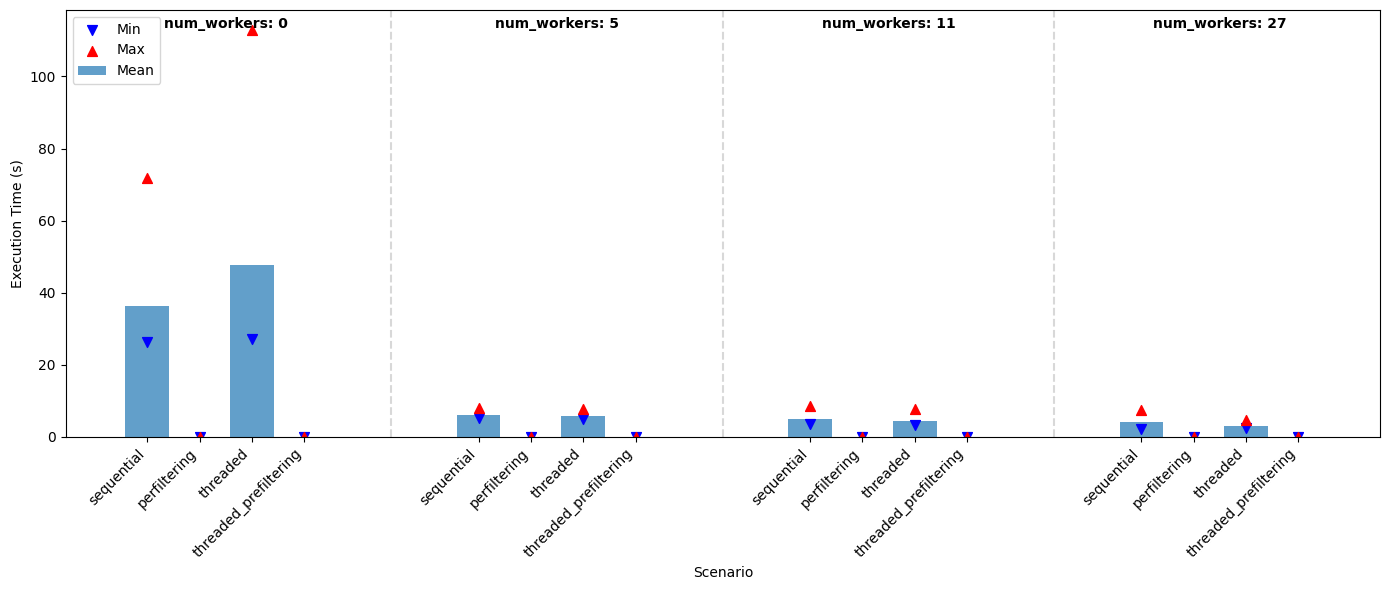

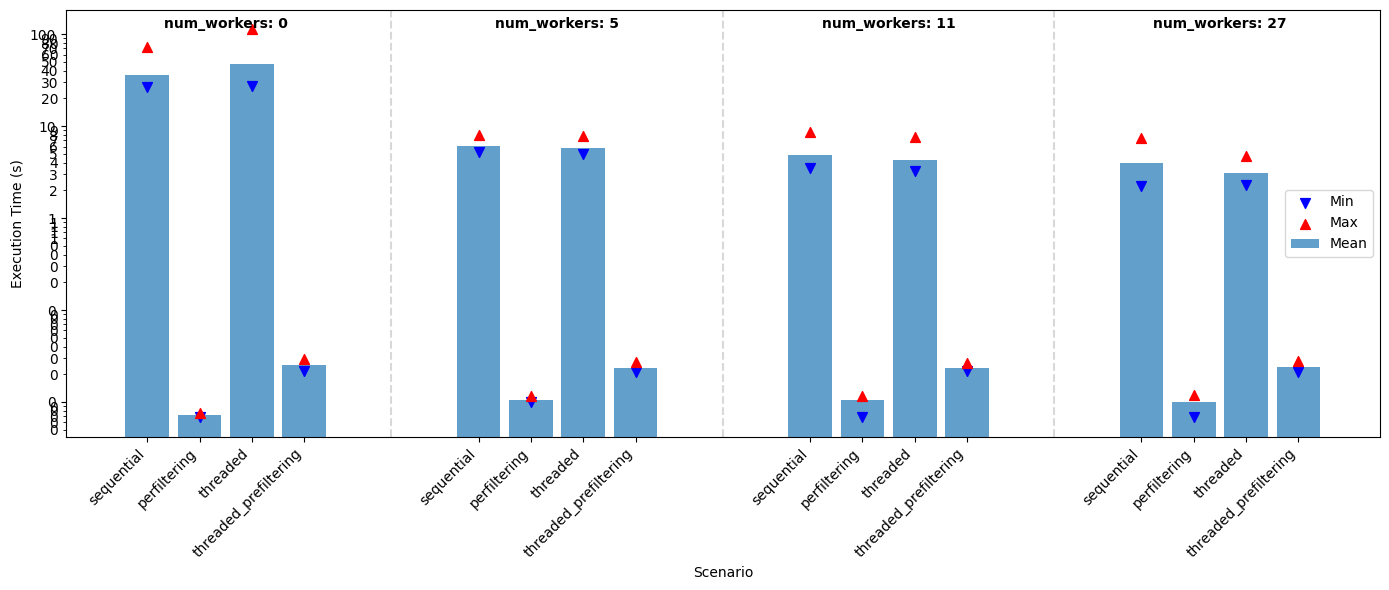

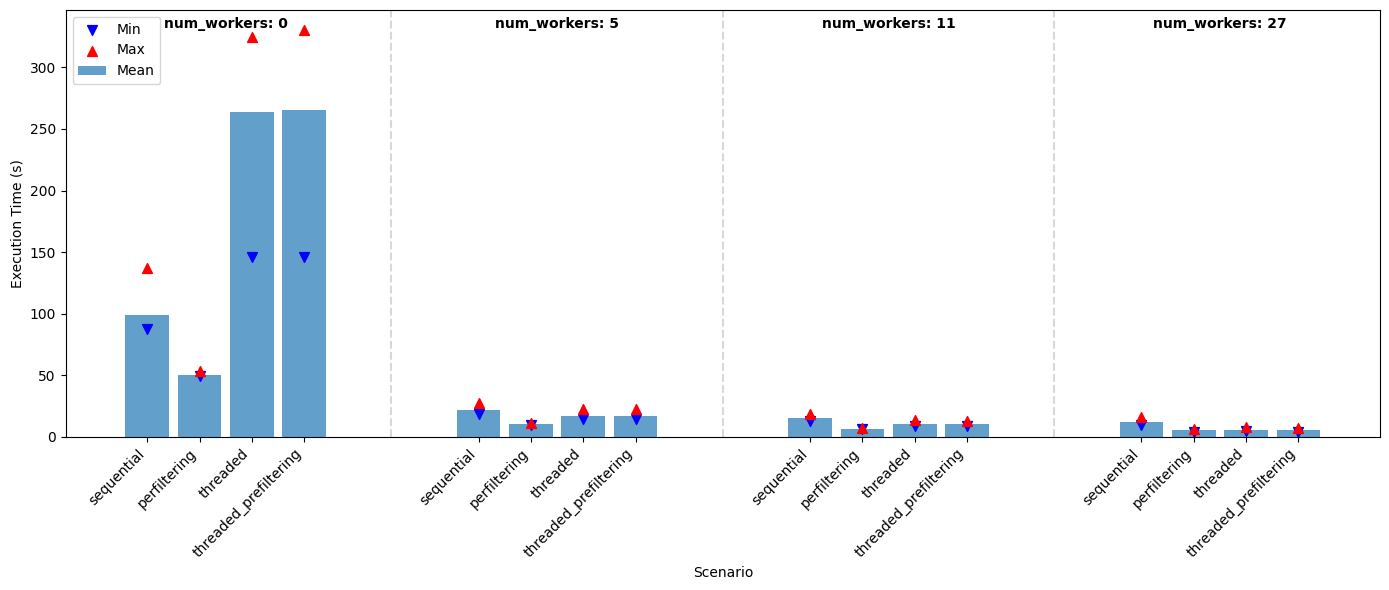

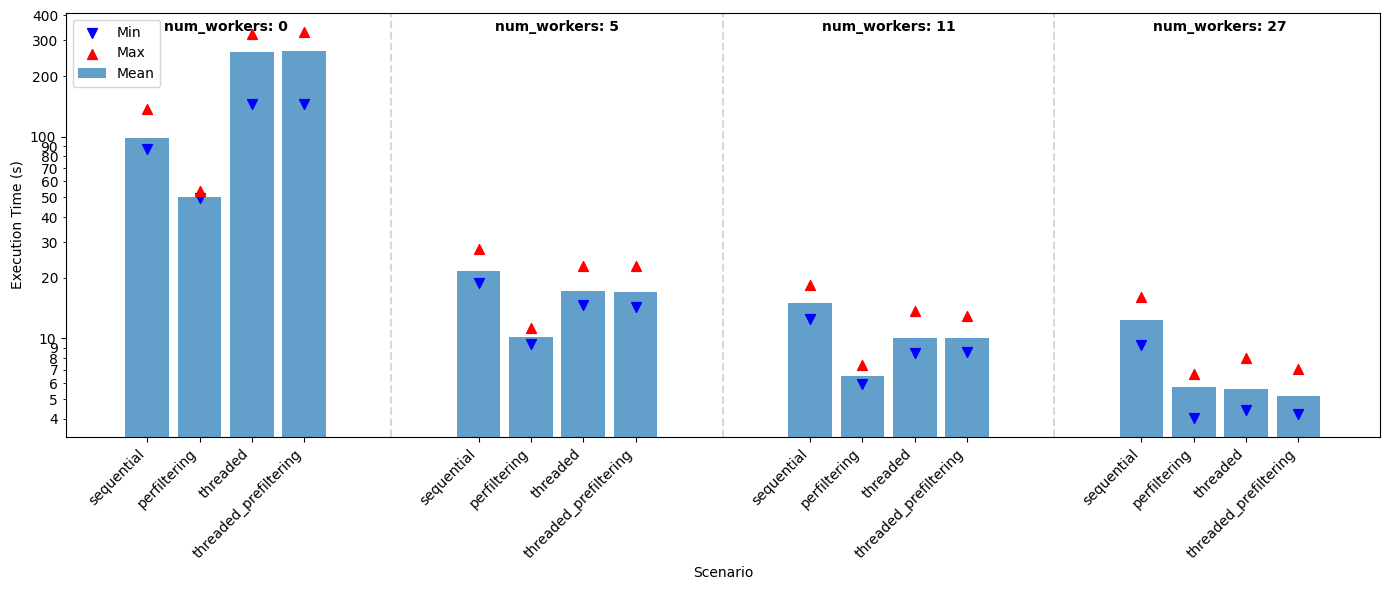

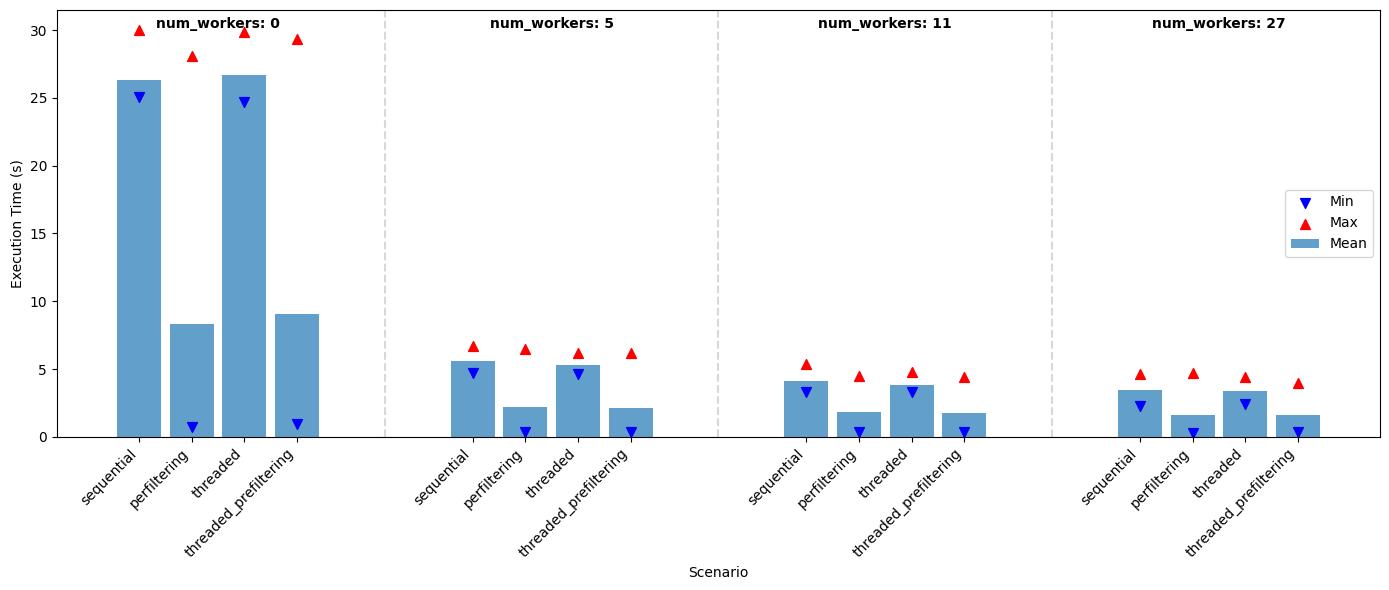

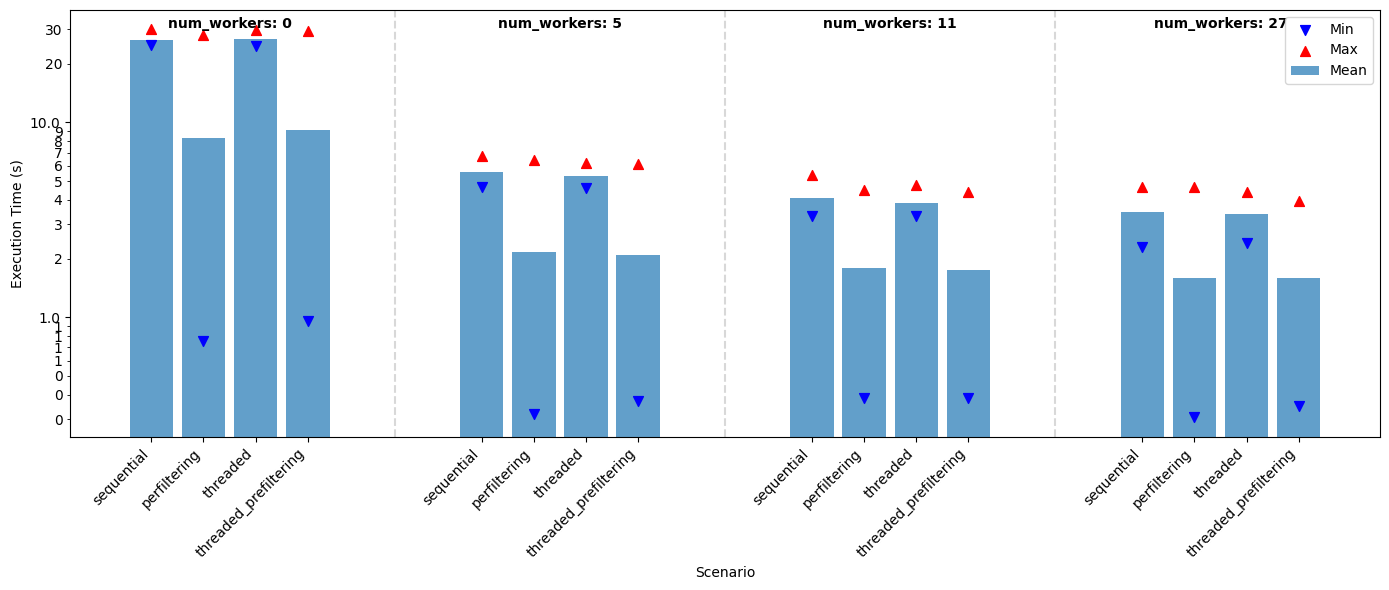

In [13]:
# Compare execution time (y-axis min, max, mean) against scenario and num_workers (x-axis) for one plot per fainder mode per category one plot
categories = df_latest["category"].unique()
fainder_modes = ["exact"]

logger.info("=== Execution Time Analysis by Workers and Scenario ===")

# List to collect all worker-scenario statistics for CSV export
worker_scenario_stats = []

for category in categories:
    df_category = df_latest[df_latest["category"] == category]
    logger.info(f"Analyzing category: {category} with {len(df_category)} records")

    for fainder_mode in fainder_modes:
        df_fainder_mode = df_category[df_category["fainder_mode"] == fainder_mode]
        logger.info(f"  Fainder mode: {fainder_mode} with {len(df_fainder_mode)} records")

        if df_fainder_mode.empty:
            logger.info(f"    No data for {category} - {fainder_mode}, skipping")
            continue

        # Group first by workers then by scenario
        grouped_data = df_fainder_mode.groupby(["fainder_max_workers", "scenario"])

        # Collect detailed statistics for each worker-scenario combination
        category_scenario_data = []
        
        for (workers, scenario), group in grouped_data:
            execution_times = group["execution_time"]

            # Calculate statistics
            min_time = execution_times.min()
            max_time = execution_times.max()
            mean_time = execution_times.mean()
            std_time = execution_times.std()
            count = len(execution_times)
            
            stats_record = {
                'category': category,
                'fainder_mode': fainder_mode,
                'workers': workers,
                'scenario': scenario,
                'mean': mean_time,
                'min': min_time,
                'max': max_time,
                'std': std_time,
                'count': count,
                'median': execution_times.median(),
                'q25': execution_times.quantile(0.25),
                'q75': execution_times.quantile(0.75)
            }
            
            category_scenario_data.append(stats_record)
            worker_scenario_stats.append(stats_record)
            
            logger.info(f"      {workers} workers, {scenario}: "
                       f"mean={mean_time:.4f}s, min={min_time:.4f}s, max={max_time:.4f}s "
                       f"(n={count})")

        # Save category-specific worker-scenario data to CSV
        if category_scenario_data:
            category_scenario_df = pd.DataFrame(category_scenario_data)
            category_scenario_file = csv_dir / f"worker_scenario_{category}_{fainder_mode}_{timestamp}.csv"
            category_scenario_df.to_csv(category_scenario_file, index=False)
            logger.info(f"    Saved {category} worker-scenario data to: {category_scenario_file}")

        # Create two figures - one with linear scale, one with log scale
        for scale_type in ["linear", "log"]:
            plt.figure(figsize=(14, 6))
            #plt.title(
            #    f"Execution Time by Workers and Scenario - {category} - {fainder_mode} ({scale_type} scale)"
            #)
            plt.xlabel("Scenario")
            plt.ylabel("Execution Time (s)")

            # Set log scale if needed
            if scale_type == "log":
                plt.yscale("log")
                # Force y-axis to show actual numbers instead of scientific notation
                plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter())
                plt.gca().yaxis.set_minor_formatter(plt.ScalarFormatter())

            # Get unique workers and scenarios
            unique_workers = sorted(df_fainder_mode["fainder_max_workers"].unique())
            unique_scenarios = df_fainder_mode["scenario"].unique()

            # Set up positions for bar groups with smaller separation between same workers
            groups = list(grouped_data.groups.keys())

            # Create a dictionary to map (worker, scenario) to x position
            x_pos_map = {}
            current_x = 0

            for worker in unique_workers:
                # Create positions for this worker's scenarios with small gaps between them
                scenario_positions = [
                    current_x + i * 0.3 for i in range(len(unique_scenarios))
                ]
                for i, scenario in enumerate(unique_scenarios):
                    x_pos_map[(worker, scenario)] = scenario_positions[i]

                # Add larger gap between different worker groups
                current_x = scenario_positions[-1] + 1

            # Get x positions for each group
            x_positions = [x_pos_map[(worker, scenario)] for worker, scenario in groups]

            # Prepare labels
            labels = [f"{workers} - {scenario}" for workers, scenario in groups]

            # Collect data for plotting
            min_times = []
            max_times = []
            mean_times = []

            logger.info(f"    {scale_type} scale analysis:")
            for (workers, scenario), group in grouped_data:
                execution_times = group["execution_time"]

                # Calculate statistics
                min_time = execution_times.min()
                max_time = execution_times.max()
                mean_time = execution_times.mean()
                
                min_times.append(min_time)
                max_times.append(max_time)
                mean_times.append(mean_time)

            # Create bars for mean values
            plt.bar(x_positions, mean_times, width=0.25, alpha=0.7, label="Mean")

            # Add markers for min and max
            plt.scatter(
                x_positions, min_times, marker="v", color="blue", s=50, label="Min"
            )
            plt.scatter(
                x_positions, max_times, marker="^", color="red", s=50, label="Max"
            )

            # Add vertical lines to separate worker groups
            current_line_x = -0.5
            for worker in unique_workers[:-1]:  # Don't add line after last worker
                current_line_x = x_pos_map[(worker, unique_scenarios[-1])] + 0.5
                plt.axvline(x=current_line_x, color="gray", linestyle="--", alpha=0.3)

            # Add worker labels centered for each group
            for worker in unique_workers:
                first_x = x_pos_map[(worker, unique_scenarios[0])]
                last_x = x_pos_map[(worker, unique_scenarios[-1])]

                # worker underneath the top of the y-axis
                if scale_type == "log":
                    y_bottom, y_top = plt.ylim()
                    y_pos = np.exp(
                        np.log(y_top) - (np.log(y_top) - np.log(y_bottom)) * 0.05
                    )
                else:
                    y_pos = plt.ylim()[1] * 0.95

                plt.text(
                    (first_x + last_x) / 2,
                    y_pos,
                    f"num_workers: {worker}",
                    ha="center",
                    va="bottom",
                    fontsize=10,
                    fontweight="bold",
                )

            # Set the x-tick labels to scenario names (not workers)
            plt.xticks(
                x_positions,
                [scenario for _, scenario in groups],
                rotation=45,
                ha="right",
            )

            plt.legend()
            plt.tight_layout()
            
            if scale_type == "linear":
                filename = f"figures/analysis/{category}_{fainder_mode}_by_workers_scenario.png"
            else:
                filename = f"figures/analysis/{category}_{fainder_mode}_by_workers_scenario_{scale_type}.png"
            
            plt.savefig(filename)
            logger.info(f"    Saved {scale_type} scale plot: {filename}")

# Save all worker-scenario statistics to CSV
if worker_scenario_stats:
    worker_scenario_stats_df = pd.DataFrame(worker_scenario_stats)
    worker_scenario_stats_file = csv_dir / f"all_worker_scenario_stats_{timestamp}.csv"
    worker_scenario_stats_df.to_csv(worker_scenario_stats_file, index=False)
    logger.info(f"Saved all worker-scenario statistics to: {worker_scenario_stats_file}")

2025-07-03 13:39:44,414 - INFO - === Grouped Categories Heatmap Analysis ===
2025-07-03 13:39:44,417 - INFO - Analyzing fainder mode: full_precision
2025-07-03 13:39:44,422 - INFO -   Group Only_Percentile_Combinations: 2980 records
2025-07-03 13:39:44,417 - INFO - Analyzing fainder mode: full_precision
2025-07-03 13:39:44,422 - INFO -   Group Only_Percentile_Combinations: 2980 records
/tmp/ipykernel_106742/2189756618.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group["scenario_workers"] = df_group.apply(
2025-07-03 13:39:44,444 - INFO -     Saved pivot table to: figures/analysis/csv_exports/grouped_heatmap_Only_Percentile_Combinations_full_precision_20250703_133928.csv
2025-07-03 13:39:44,445 - INFO -     Pivot table shape: (16, 2)
20

2025-07-03 13:39:44,803 - INFO -     Saved heatmap: figures/analysis/heatmap_Only_Percentile_Combinations_full_precision.png


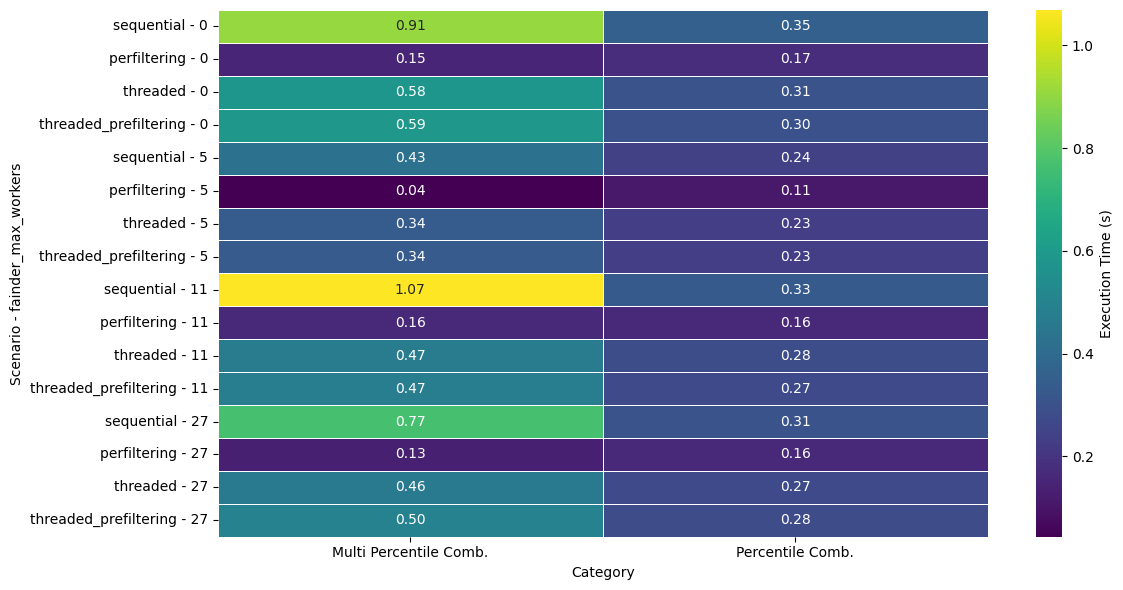

2025-07-03 13:39:44,876 - INFO -   Group Keyword_and_pp: 5152 records
/tmp/ipykernel_106742/2189756618.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group["scenario_workers"] = df_group.apply(
2025-07-03 13:39:44,901 - INFO -     Saved pivot table to: figures/analysis/csv_exports/grouped_heatmap_Keyword_and_pp_full_precision_20250703_133928.csv
2025-07-03 13:39:44,901 - INFO -     Pivot table shape: (16, 4)
2025-07-03 13:39:44,902 - INFO -     Overall stats - Mean: 0.4707s, Min: 0.1706s, Max: 1.3678s
2025-07-03 13:39:44,903 - INFO -       Double Expected Form: mean=0.5052s, min=0.2894s, max=0.6150s
2025-07-03 13:39:44,903 - INFO -       Expected Form: mean=0.2425s, min=0.2046s, max=0.2786s
2025-07-03 13:39:44,904 - INFO -       Expected

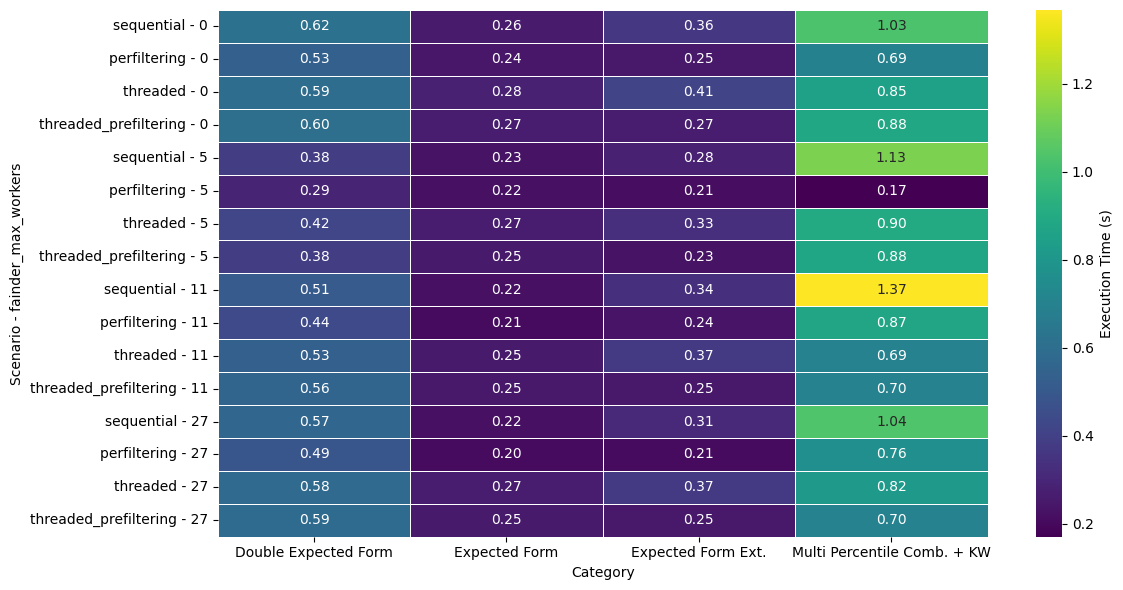

2025-07-03 13:39:45,349 - INFO -   Group Early_Empty_Results: 3040 records
/tmp/ipykernel_106742/2189756618.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group["scenario_workers"] = df_group.apply(
2025-07-03 13:39:45,368 - INFO -     Saved pivot table to: figures/analysis/csv_exports/grouped_heatmap_Early_Empty_Results_full_precision_20250703_133928.csv
2025-07-03 13:39:45,369 - INFO -     Pivot table shape: (16, 2)
2025-07-03 13:39:45,369 - INFO -     Overall stats - Mean: 0.3951s, Min: 0.0101s, Max: 1.1437s
2025-07-03 13:39:45,370 - INFO -       Early Exit Results: mean=0.1131s, min=0.0101s, max=0.2542s
2025-07-03 13:39:45,370 - INFO -       Middle Exit Results: mean=0.6770s, min=0.3500s, max=1.1437s
/tmp/ipykernel_106742/2189756618.

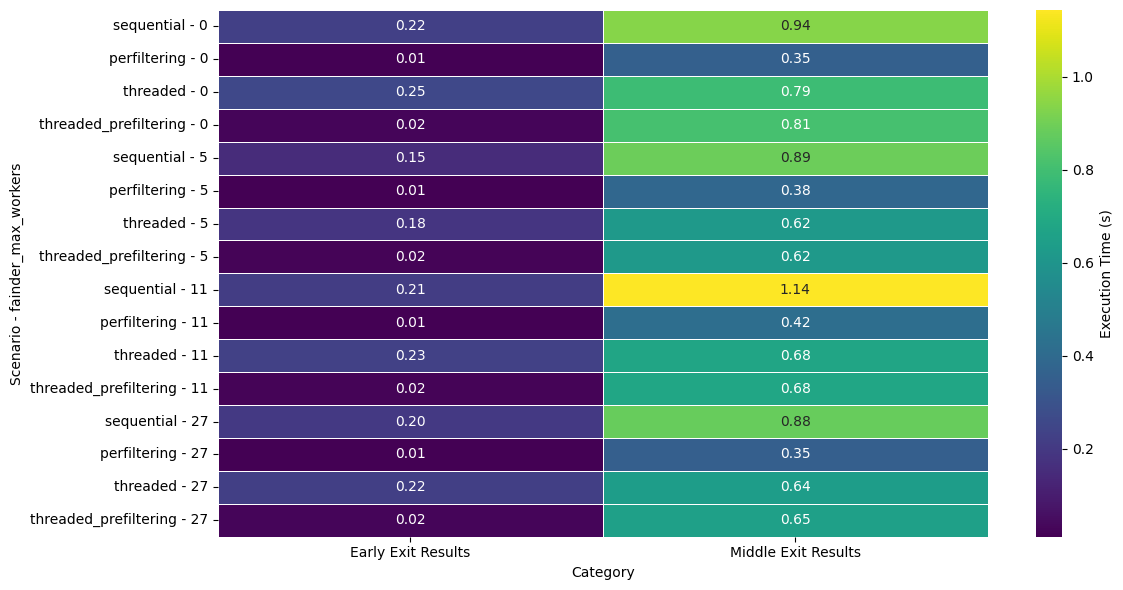

2025-07-03 13:39:45,753 - INFO - Analyzing fainder mode: exact
2025-07-03 13:39:45,757 - INFO -   Group Only_Percentile_Combinations: 2980 records
2025-07-03 13:39:45,757 - INFO -   Group Only_Percentile_Combinations: 2980 records
/tmp/ipykernel_106742/2189756618.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group["scenario_workers"] = df_group.apply(
2025-07-03 13:39:45,772 - INFO -     Saved pivot table to: figures/analysis/csv_exports/grouped_heatmap_Only_Percentile_Combinations_exact_20250703_133928.csv
2025-07-03 13:39:45,773 - INFO -     Pivot table shape: (16, 2)
2025-07-03 13:39:45,773 - INFO -     Overall stats - Mean: 55.0163s, Min: 3.4731s, Max: 486.0271s
2025-07-03 13:39:45,774 - INFO -       Multi Percentile Comb.: mean=85.

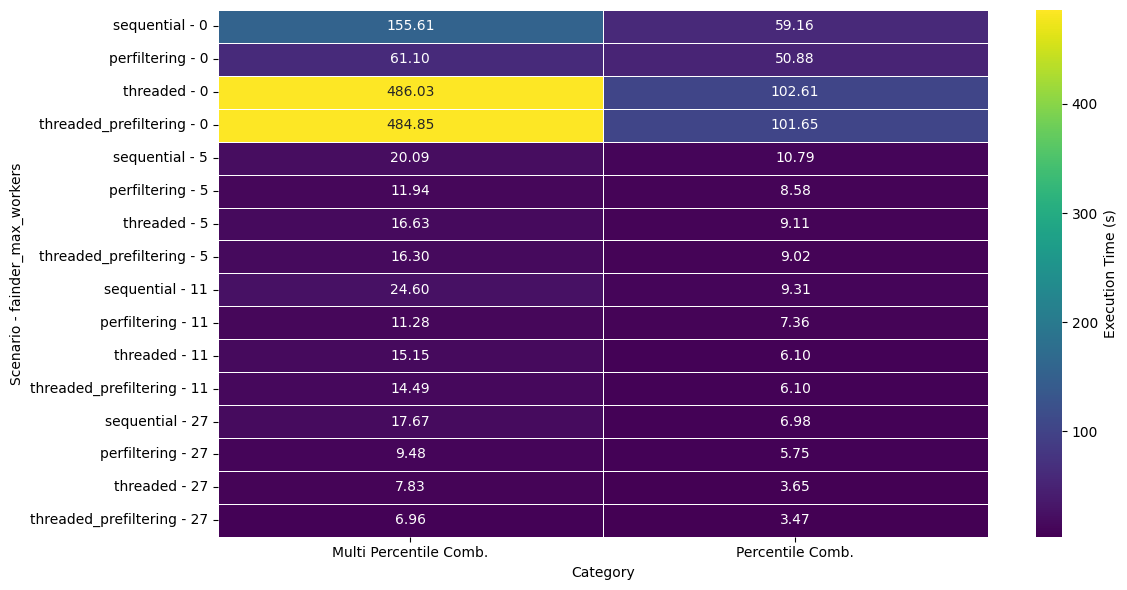

2025-07-03 13:39:46,159 - INFO -   Group Keyword_and_pp: 5152 records
/tmp/ipykernel_106742/2189756618.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group["scenario_workers"] = df_group.apply(
2025-07-03 13:39:46,184 - INFO -     Saved pivot table to: figures/analysis/csv_exports/grouped_heatmap_Keyword_and_pp_exact_20250703_133928.csv
2025-07-03 13:39:46,185 - INFO -     Pivot table shape: (16, 4)
2025-07-03 13:39:46,185 - INFO -     Overall stats - Mean: 23.7772s, Min: 0.5076s, Max: 688.8193s
2025-07-03 13:39:46,186 - INFO -       Double Expected Form: mean=9.9588s, min=0.5919s, max=64.1682s
2025-07-03 13:39:46,186 - INFO -       Expected Form: mean=5.3374s, min=0.5076s, max=27.7743s
2025-07-03 13:39:46,186 - INFO -       Expected For

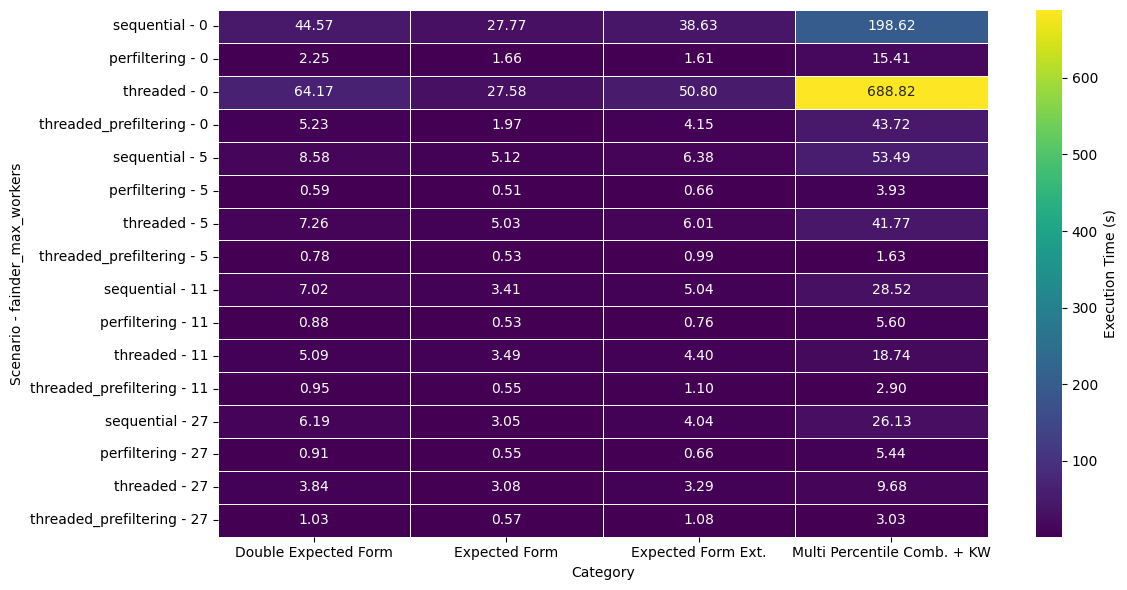

2025-07-03 13:39:46,627 - INFO -   Group Early_Empty_Results: 3040 records
/tmp/ipykernel_106742/2189756618.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group["scenario_workers"] = df_group.apply(
2025-07-03 13:39:46,642 - INFO -     Saved pivot table to: figures/analysis/csv_exports/grouped_heatmap_Early_Empty_Results_exact_20250703_133928.csv
2025-07-03 13:39:46,643 - INFO -     Pivot table shape: (16, 2)
2025-07-03 13:39:46,643 - INFO -     Overall stats - Mean: 28.9788s, Min: 0.0071s, Max: 265.7423s
2025-07-03 13:39:46,643 - INFO -       Early Exit Results: mean=7.0281s, min=0.0071s, max=47.8130s
2025-07-03 13:39:46,644 - INFO -       Middle Exit Results: mean=50.9295s, min=5.1986s, max=265.7423s
/tmp/ipykernel_106742/2189756618.py

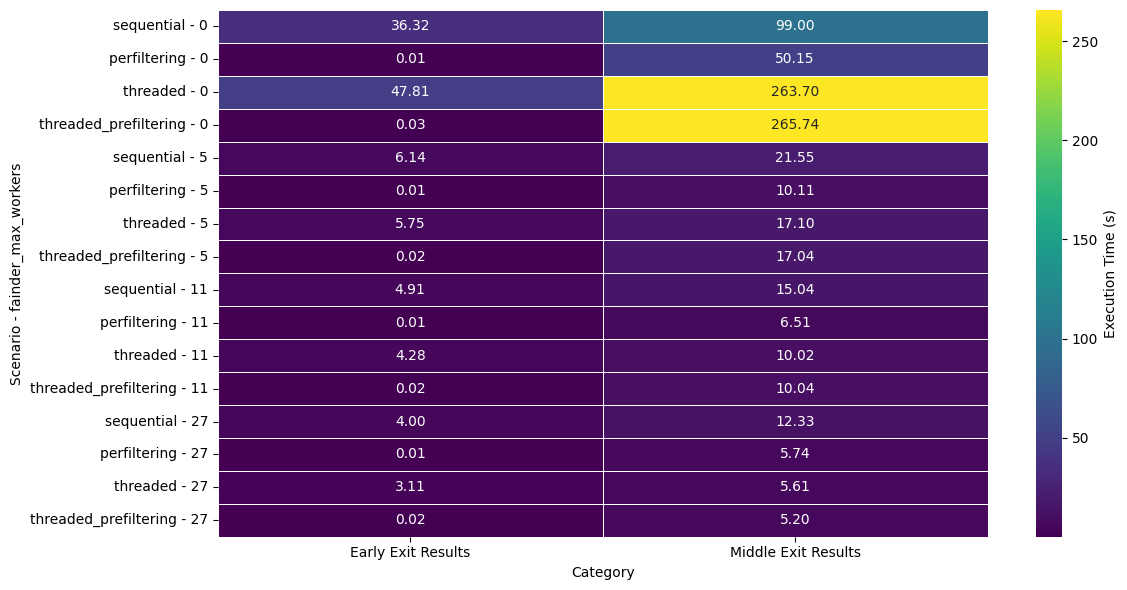

2025-07-03 13:39:47,029 - INFO - Saved grouped category statistics to: figures/analysis/csv_exports/grouped_category_stats_20250703_133928.csv
2025-07-03 13:39:47,029 - INFO - === Analysis Complete ===
2025-07-03 13:39:47,030 - INFO - All results logged to: figures/analysis/logs/analysis_results_20250703_133928.log
2025-07-03 13:39:47,030 - INFO - All CSV exports saved to: figures/analysis/csv_exports
2025-07-03 13:39:47,034 - INFO - Created export summary: figures/analysis/csv_exports/export_summary_20250703_133928.csv
2025-07-03 13:39:47,034 - INFO - Total exported data: 46 files, 16.99 MB
2025-07-03 13:39:47,029 - INFO - === Analysis Complete ===
2025-07-03 13:39:47,030 - INFO - All results logged to: figures/analysis/logs/analysis_results_20250703_133928.log
2025-07-03 13:39:47,030 - INFO - All CSV exports saved to: figures/analysis/csv_exports
2025-07-03 13:39:47,034 - INFO - Created export summary: figures/analysis/csv_exports/export_summary_20250703_133928.csv
2025-07-03 13:39:4

In [14]:
groups_of_categories = {
    "Only_Percentile_Combinations": [
        "Percentile_Combinations",
        "Multiple_Percentile_Combinations",
    ],
    "Keyword_and_pp": [
        "Expected_Form",
        "Expected_Form_Extended",
        "Multiple_percentile_combinations_with_Keyword",
        "Double_expected_Form",
    ],
    "Early_Empty_Results": ["Early_exit_Results", "Middle_exit_Results"],
}

ordered_scenarios = ["sequential", "perfiltering", "threaded", "threaded_prefiltering"]
# heatmap per group_of_categories and per fainder_mode
# x-axis: category, y-axis: scenario - fainder_max_workers, values: execution_time

category_short_names = {
    "Percentile_Combinations": "Percentile Comb.",
    "Multiple_Percentile_Combinations": "Multi Percentile Comb.",
    "Expected_Form": "Expected Form",
    "Expected_Form_Extended": "Expected Form Ext.",
    "Multiple_percentile_combinations_with_Keyword": "Multi Percentile Comb. + KW",
    "Double_expected_Form": "Double Expected Form",
    "Early_exit_Results": "Early Exit Results",
    "Middle_exit_Results": "Middle Exit Results",
}

logger.info("=== Grouped Categories Heatmap Analysis ===")

# List to collect all grouped category statistics for CSV export
grouped_category_stats = []

for fainder_mode in df_latest["fainder_mode"].unique():
    logger.info(f"Analyzing fainder mode: {fainder_mode}")
    
    for group_name, categories in groups_of_categories.items():
        # Filter for relevant categories and fainder_mode
        df_group = df_latest[
            (df_latest["category"].isin(categories))
            & (df_latest["fainder_mode"] == fainder_mode)
        ]
        if df_group.empty:
            logger.info(f"  Group {group_name}: No data available, skipping")
            continue

        logger.info(f"  Group {group_name}: {len(df_group)} records")

        # Create a combined label for scenario and workers
        df_group["scenario_workers"] = df_group.apply(
            lambda row: f"{row['scenario']} - {row['fainder_max_workers']}", axis=1
        )

        # Pivot table: rows=scenario-workers, columns=category, values=mean execution_time
        pivot = df_group.pivot_table(
            index="scenario_workers",
            columns="category",
            values="execution_time",
            aggfunc="mean",
        )

        # Sort the index by workers (as integer) first, then by scenario (using ordered_scenarios)
        def scenario_worker_sort_key(x):
            scenario, worker = x.split(" - ")
            scenario_idx = (
                ordered_scenarios.index(scenario)
                if scenario in ordered_scenarios
                else len(ordered_scenarios)
            )
            return (int(worker), scenario_idx)

        pivot = pivot.reindex(sorted(pivot.index, key=scenario_worker_sort_key), axis=0)
        pivot = pivot.rename(columns=category_short_names)

        # Save pivot table to CSV
        pivot_csv_file = csv_dir / f"grouped_heatmap_{group_name}_{fainder_mode}_{timestamp}.csv"
        pivot.to_csv(pivot_csv_file)
        logger.info(f"    Saved pivot table to: {pivot_csv_file}")

        # Log pivot table statistics and collect for summary
        logger.info(f"    Pivot table shape: {pivot.shape}")
        pivot_values = pivot.values[~np.isnan(pivot.values)]
        if len(pivot_values) > 0:
            group_overall_stats = {
                'fainder_mode': fainder_mode,
                'group_name': group_name,
                'categories_included': ', '.join(categories),
                'shape_rows': pivot.shape[0],
                'shape_cols': pivot.shape[1],
                'mean': np.mean(pivot_values),
                'min': np.min(pivot_values),
                'max': np.max(pivot_values),
                'std': np.std(pivot_values),
                'valid_data_points': len(pivot_values),
                'total_data_points': pivot.size
            }
            grouped_category_stats.append(group_overall_stats)
            
            logger.info(f"    Overall stats - Mean: {group_overall_stats['mean']:.4f}s, "
                       f"Min: {group_overall_stats['min']:.4f}s, "
                       f"Max: {group_overall_stats['max']:.4f}s")
            
            # Log per-category statistics
            for col in pivot.columns:
                col_values = pivot[col].dropna()
                if len(col_values) > 0:
                    logger.info(f"      {col}: mean={col_values.mean():.4f}s, "
                               f"min={col_values.min():.4f}s, max={col_values.max():.4f}s")

        plt.figure(figsize=(12, 6))
        sns.heatmap(
            pivot,
            annot=True,
            fmt=".2f",
            cmap="viridis",
            linewidths=0.5,
            cbar_kws={"label": "Execution Time (s)"},
        )
        #plt.title(
        #    f"Execution Time Heatmap - {group_name.replace('_', ' ')} - {fainder_mode}"
        #)
        plt.xlabel("Category")
        plt.ylabel("Scenario - fainder_max_workers")
        plt.tight_layout()
        
        filename = f"figures/analysis/heatmap_{group_name}_{fainder_mode}.png"
        plt.savefig(
            filename,
            bbox_inches="tight",
            dpi=300,
        )
        logger.info(f"    Saved heatmap: {filename}")
        plt.show()

# Save grouped category statistics to CSV
if grouped_category_stats:
    grouped_category_stats_df = pd.DataFrame(grouped_category_stats)
    grouped_category_stats_file = csv_dir / f"grouped_category_stats_{timestamp}.csv"
    grouped_category_stats_df.to_csv(grouped_category_stats_file, index=False)
    logger.info(f"Saved grouped category statistics to: {grouped_category_stats_file}")

logger.info("=== Analysis Complete ===")
logger.info(f"All results logged to: {log_file}")
logger.info(f"All CSV exports saved to: {csv_dir}")

# Create a summary of all exported files
export_summary = []
for csv_file in csv_dir.glob(f"*_{timestamp}.csv"):
    file_size = csv_file.stat().st_size
    export_summary.append({
        'filename': csv_file.name,
        'file_path': str(csv_file),
        'size_bytes': file_size,
        'size_mb': file_size / (1024 * 1024)
    })

if export_summary:
    export_summary_df = pd.DataFrame(export_summary)
    export_summary_file = csv_dir / f"export_summary_{timestamp}.csv"
    export_summary_df.to_csv(export_summary_file, index=False)
    logger.info(f"Created export summary: {export_summary_file}")
    
    total_size_mb = export_summary_df['size_mb'].sum()
    logger.info(f"Total exported data: {len(export_summary)} files, {total_size_mb:.2f} MB")